## **GSR**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

gsr=pd.read_csv('6_GSR.csv')
gsr.head()

C:\Users\Hp\AppData\Local\Temp\ipykernel_4328\1923707618.py:6: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  gsr=pd.read_csv('6_GSR.csv')


UnixTime  Row QuestionKey                   Timestamp  SampleNumber  \
0  1.679143e+09    1         NaN  2023-03-18 18:01:08.031996           NaN   
1  1.679143e+09    2         NaN  2023-03-18 18:01:08.038059       20109.0   
2  1.679143e+09    3         NaN  2023-03-18 18:01:08.045872       20110.0   
3  1.679143e+09    4         NaN  2023-03-18 18:01:08.053684       20111.0   
4  1.679143e+09    5         NaN  2023-03-18 18:01:08.061497       20112.0   

   Timestamp RAW  Timestamp CAL  System Timestamp CAL  VSenseBatt RAW  \
0            NaN            NaN                   NaN             NaN   
1      1125481.0    157101.5625          1.679143e+12          2554.0   
2      1125737.0    157109.3750          1.679143e+12          2550.0   
3      1125993.0    157117.1875          1.679143e+12          2559.0   
4      1126249.0    157125.0000          1.679143e+12          2537.0   

   VSenseBatt CAL  GSR RAW  GSR Resistance CAL  GSR Conductance CAL  \
0             NaN      NaN                 NaN                  NaN   
1     3719.671795  35340.0          361.206668             2.768498   
2     3713.846154  35340.0          361.206668             2.768498   
3     3726.953846  35339.0          361.397935             2.767033   
4     3694.912821  35341.0          361.015604             2.769963   

   Packet reception rate RAW  
0                        NaN  
1                       92.0  
2                       92.0  
3                       92.0  
4                       92.0

In [2]:
gsr.isnull().sum()

UnixTime                         0
Row                              0
QuestionKey                  67791
Timestamp                        0
SampleNumber                     4
Timestamp RAW                    4
Timestamp CAL                    4
System Timestamp CAL             4
VSenseBatt RAW                   4
VSenseBatt CAL                   4
GSR RAW                          4
GSR Resistance CAL               4
GSR Conductance CAL              4
Packet reception rate RAW        4
dtype: int64

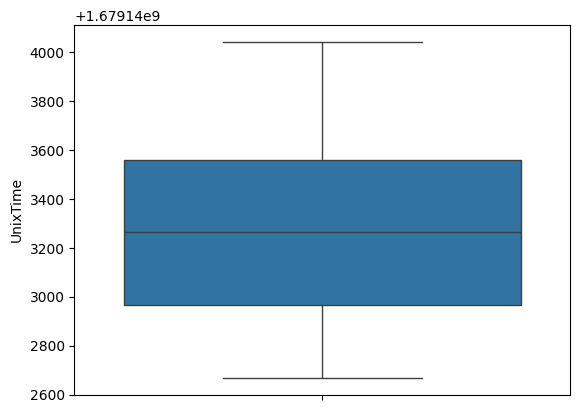

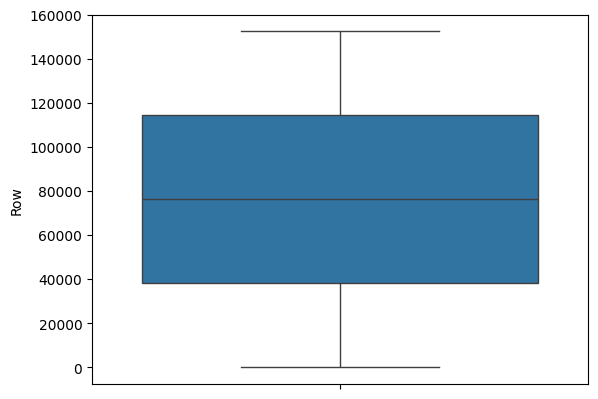

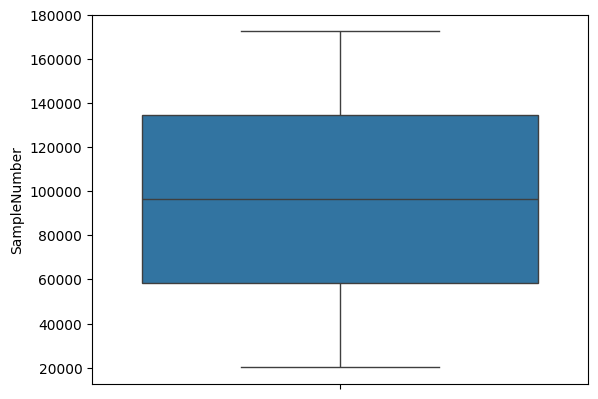

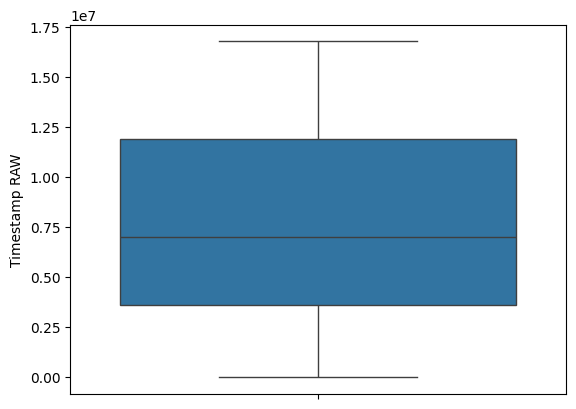

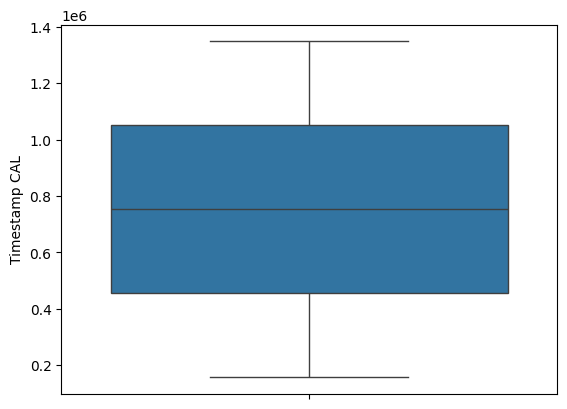

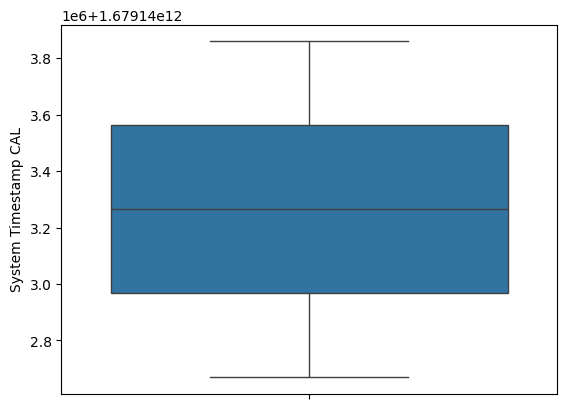

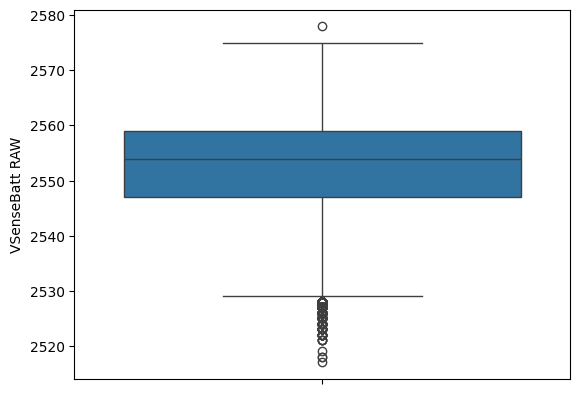

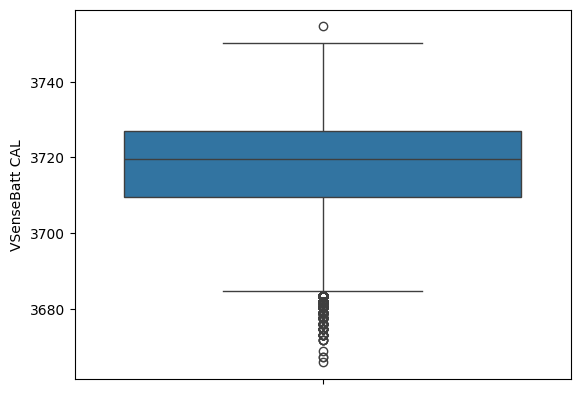

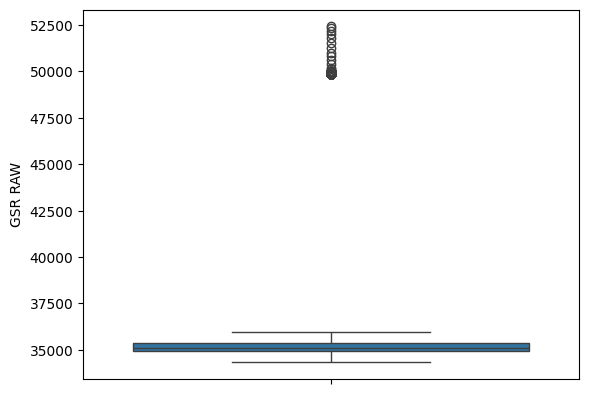

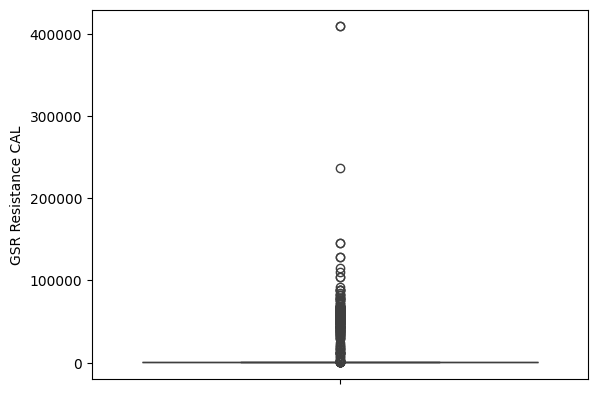

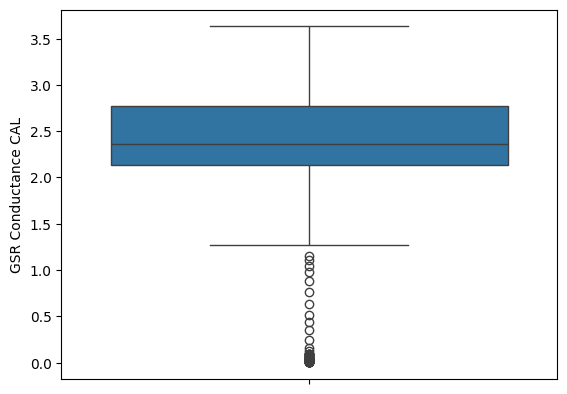

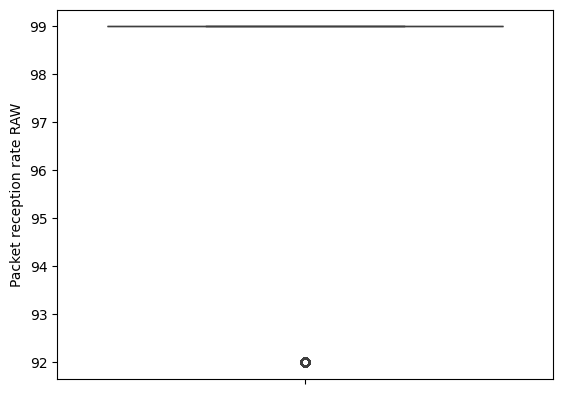

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
gsr_ol=gsr.select_dtypes(include=['float64','int64']).columns
for col in gsr_ol:
    
   sns.boxplot(data=gsr[col])
   plt.xticks(rotation=45)
   plt.show()

In [4]:
print(gsr.columns.tolist())

['UnixTime', 'Row', 'QuestionKey', 'Timestamp', 'SampleNumber', 'Timestamp RAW', 'Timestamp CAL', 'System Timestamp CAL', 'VSenseBatt RAW', 'VSenseBatt CAL', 'GSR RAW', 'GSR Resistance CAL', 'GSR Conductance CAL', 'Packet reception rate RAW']


In [5]:
gsr=gsr.dropna(subset=['SampleNumber', 'Timestamp RAW', 'Timestamp CAL', 'System Timestamp CAL', 'VSenseBatt RAW', 'VSenseBatt CAL', 'GSR RAW', 'GSR Resistance CAL', 'GSR Conductance CAL', 'Packet reception rate RAW'])

In [6]:
gsr.isnull().sum()

UnixTime                         0
Row                              0
QuestionKey                  67787
Timestamp                        0
SampleNumber                     0
Timestamp RAW                    0
Timestamp CAL                    0
System Timestamp CAL             0
VSenseBatt RAW                   0
VSenseBatt CAL                   0
GSR RAW                          0
GSR Resistance CAL               0
GSR Conductance CAL              0
Packet reception rate RAW        0
dtype: int64

In [7]:
for col in gsr.select_dtypes(include=['object']).columns:
    gsr[col]=gsr[col].fillna(gsr[col].mode()[0])

In [8]:
gsr.isnull().sum()

UnixTime                     0
Row                          0
QuestionKey                  0
Timestamp                    0
SampleNumber                 0
Timestamp RAW                0
Timestamp CAL                0
System Timestamp CAL         0
VSenseBatt RAW               0
VSenseBatt CAL               0
GSR RAW                      0
GSR Resistance CAL           0
GSR Conductance CAL          0
Packet reception rate RAW    0
dtype: int64

In [9]:
gsr['Timestamp']=pd.to_datetime(gsr['Timestamp'], errors='coerce')

In [10]:
gsr.head()

UnixTime  Row QuestionKey                  Timestamp  SampleNumber  \
1  1.679143e+09    2      1Item3 2023-03-18 18:01:08.038059       20109.0   
2  1.679143e+09    3      1Item3 2023-03-18 18:01:08.045872       20110.0   
3  1.679143e+09    4      1Item3 2023-03-18 18:01:08.053684       20111.0   
4  1.679143e+09    5      1Item3 2023-03-18 18:01:08.061497       20112.0   
5  1.679143e+09    6      1Item3 2023-03-18 18:01:08.069309       20113.0   

   Timestamp RAW  Timestamp CAL  System Timestamp CAL  VSenseBatt RAW  \
1      1125481.0    157101.5625          1.679143e+12          2554.0   
2      1125737.0    157109.3750          1.679143e+12          2550.0   
3      1125993.0    157117.1875          1.679143e+12          2559.0   
4      1126249.0    157125.0000          1.679143e+12          2537.0   
5      1126505.0    157132.8125          1.679143e+12          2565.0   

   VSenseBatt CAL  GSR RAW  GSR Resistance CAL  GSR Conductance CAL  \
1     3719.671795  35340.0          361.206668             2.768498   
2     3713.846154  35340.0          361.206668             2.768498   
3     3726.953846  35339.0          361.397935             2.767033   
4     3694.912821  35341.0          361.015604             2.769963   
5     3735.692308  35340.0          361.206668             2.768498   

   Packet reception rate RAW  
1                       92.0  
2                       92.0  
3                       92.0  
4                       92.0  
5                       92.0

In [11]:
gsr.dtypes

UnixTime                            float64
Row                                   int64
QuestionKey                          object
Timestamp                    datetime64[ns]
SampleNumber                        float64
Timestamp RAW                       float64
Timestamp CAL                       float64
System Timestamp CAL                float64
VSenseBatt RAW                      float64
VSenseBatt CAL                      float64
GSR RAW                             float64
GSR Resistance CAL                  float64
GSR Conductance CAL                 float64
Packet reception rate RAW           float64
dtype: object

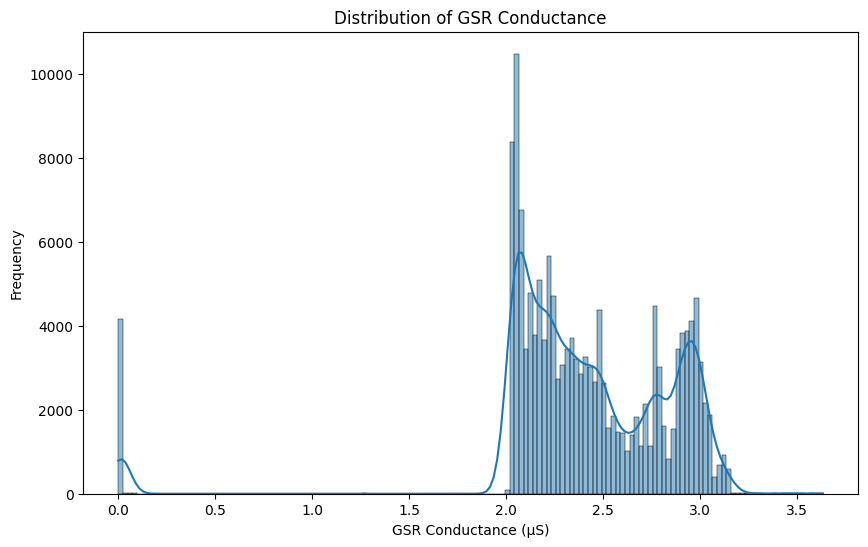

In [12]:
# 1. GSR Conductance Distribution
plt.figure(figsize=(10, 6))
sns.histplot(gsr['GSR Conductance CAL'], kde=True)
plt.title('Distribution of GSR Conductance')
plt.xlabel('GSR Conductance (µS)')
plt.ylabel('Frequency')
# plt.savefig('gsr_conductance_distribution.png')
plt.show()

The data shows a multi-modal distribution, with several peaks, suggesting different clusters or states of GSR conductance. The most prominent peak is around 2.0-2.2 $\mu$S, with other significant peaks near 0 $\mu$S and around 2.8-3.0 $\mu$S

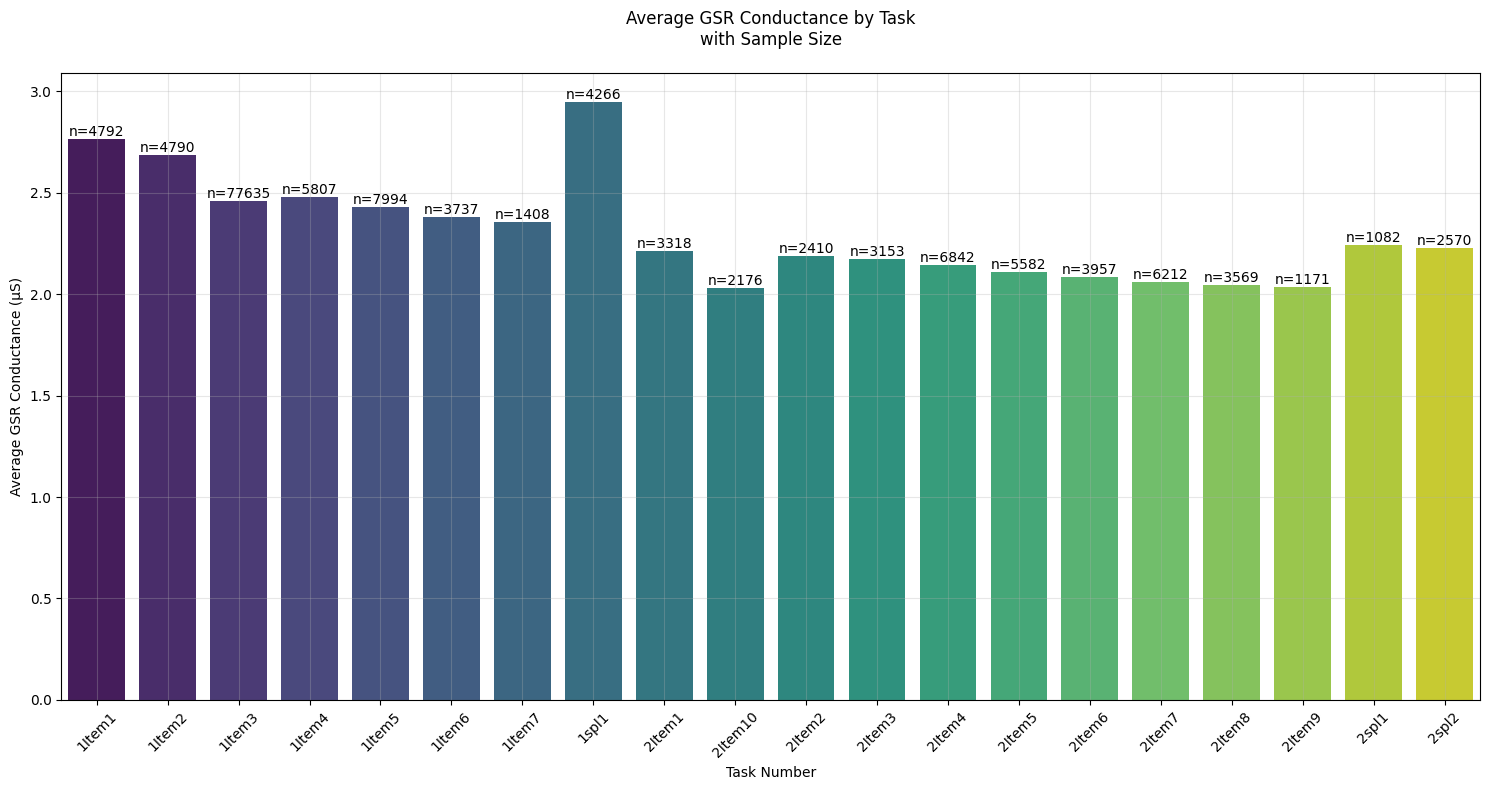

In [13]:
# Grouping GSR data by QuestionKey and calculating stats
task_gsr = gsr.groupby('QuestionKey')['GSR Conductance CAL'].agg(['mean', 'count']).reset_index()

# Set up the plot
plt.figure(figsize=(15, 8))

# Create a barplot of the mean GSR for each task
# ax = sns.barplot(x='QuestionKey', y='mean', data=task_gsr, palette='viridis')
ax = sns.barplot(x='QuestionKey', y='mean', data=task_gsr, hue='QuestionKey', palette='viridis', legend=False)

# Add text labels on each bar showing the sample size
for i, row in task_gsr.iterrows():
    plt.text(i, row['mean'], f'n={int(row["count"])}', 
             ha='center', va='bottom')

# Title and axis labels
plt.title('Average GSR Conductance by Task\nwith Sample Size', pad=20)
plt.xlabel('Task Number')
plt.ylabel('Average GSR Conductance (µS)')

# Improve readability: rotate x-axis labels
plt.xticks(rotation=45)

# Add a light grid
plt.grid(True, alpha=0.3)

# Adjust layout to fit elements nicely
plt.tight_layout()

# Save the figure as a PNG with high resolution
# plt.savefig('gsr_by_task_no_errorbar.png', bbox_inches='tight', dpi=300)

# Close the plot (good practice when generating multiple plots)
plt.show()


In brief, the plot illustrates the average Galvanic Skin Response (GSR) Conductance for different "Tasks" (labeled as "Item1" through "Item7" and "2tem1" through "2tp2"), with the number of data points (sample size, 'n') for each task indicated above its respective bar.

In [14]:
gsr.columns.tolist()

['UnixTime',
 'Row',
 'QuestionKey',
 'Timestamp',
 'SampleNumber',
 'Timestamp RAW',
 'Timestamp CAL',
 'System Timestamp CAL',
 'VSenseBatt RAW',
 'VSenseBatt CAL',
 'GSR RAW',
 'GSR Resistance CAL',
 'GSR Conductance CAL',
 'Packet reception rate RAW']

In [16]:
gsr.head()

UnixTime  Row QuestionKey                  Timestamp  SampleNumber  \
1  1.679143e+09    2      1Item3 2023-03-18 18:01:08.038059       20109.0   
2  1.679143e+09    3      1Item3 2023-03-18 18:01:08.045872       20110.0   
3  1.679143e+09    4      1Item3 2023-03-18 18:01:08.053684       20111.0   
4  1.679143e+09    5      1Item3 2023-03-18 18:01:08.061497       20112.0   
5  1.679143e+09    6      1Item3 2023-03-18 18:01:08.069309       20113.0   

   Timestamp RAW  Timestamp CAL  System Timestamp CAL  VSenseBatt RAW  \
1      1125481.0    157101.5625          1.679143e+12          2554.0   
2      1125737.0    157109.3750          1.679143e+12          2550.0   
3      1125993.0    157117.1875          1.679143e+12          2559.0   
4      1126249.0    157125.0000          1.679143e+12          2537.0   
5      1126505.0    157132.8125          1.679143e+12          2565.0   

   VSenseBatt CAL  GSR RAW  GSR Resistance CAL  GSR Conductance CAL  \
1     3719.671795  35340.0          361.206668             2.768498   
2     3713.846154  35340.0          361.206668             2.768498   
3     3726.953846  35339.0          361.397935             2.767033   
4     3694.912821  35341.0          361.015604             2.769963   
5     3735.692308  35340.0          361.206668             2.768498   

   Packet reception rate RAW  
1                       92.0  
2                       92.0  
3                       92.0  
4                       92.0  
5                       92.0

## **PSY**

In [17]:
import pandas as pd
psy=pd.read_csv('6_PSY.csv')
psy.head()

Key  Category QuestionNumber matchOrnomatch Difficulty  verdict  \
0   1spl1         1           spl1          match       Easy  CORRECT   
1  1Item1         1          Item1          match       Easy  CORRECT   
2  1Item2         1          Item2          match       Easy  CORRECT   
3  1Item3         1          Item3          match       Easy  CORRECT   
4  1Item4         1          Item4          match     Medium  CORRECT   

   ResponseTime  routineStart          routineStamp    routineEnd  \
0     33.327188  1.679143e+09  18/03/2023, 18:04:21  1.679143e+09   
1     37.450272  1.679143e+09  18/03/2023, 18:05:21  1.679143e+09   
2     37.416775  1.679143e+09  18/03/2023, 18:05:58  1.679143e+09   
3     76.930980  1.679143e+09  18/03/2023, 18:06:36  1.679143e+09   
4     45.368655  1.679143e+09  18/03/2023, 18:07:53  1.679143e+09   

   Cat2FeedbackTime  
0               NaN  
1               NaN  
2               NaN  
3               NaN  
4               NaN

In [18]:
psy.dtypes

Key                  object
Category              int64
QuestionNumber       object
matchOrnomatch       object
Difficulty           object
verdict              object
ResponseTime        float64
routineStart        float64
routineStamp         object
routineEnd          float64
Cat2FeedbackTime    float64
dtype: object

In [19]:
psy.isnull().sum()

Key                  0
Category             0
QuestionNumber       0
matchOrnomatch       2
Difficulty           2
verdict              2
ResponseTime         0
routineStart         0
routineStamp         0
routineEnd           0
Cat2FeedbackTime    11
dtype: int64

In [20]:
psy.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
dtype: bool

In [21]:
psy['routineStart'] = pd.to_datetime(psy['routineStart'], errors='coerce')
psy['routineEnd'] = pd.to_datetime(psy['routineEnd'], errors='coerce')

In [22]:
psy.dtypes

Key                         object
Category                     int64
QuestionNumber              object
matchOrnomatch              object
Difficulty                  object
verdict                     object
ResponseTime               float64
routineStart        datetime64[ns]
routineStamp                object
routineEnd          datetime64[ns]
Cat2FeedbackTime           float64
dtype: object

In [23]:
psy['routineStamp'] = pd.to_datetime(psy['routineStamp'], dayfirst=True)

In [24]:
psy.dtypes

Key                         object
Category                     int64
QuestionNumber              object
matchOrnomatch              object
Difficulty                  object
verdict                     object
ResponseTime               float64
routineStart        datetime64[ns]
routineStamp        datetime64[ns]
routineEnd          datetime64[ns]
Cat2FeedbackTime           float64
dtype: object

In [25]:
psy.head()

Key  Category QuestionNumber matchOrnomatch Difficulty  verdict  \
0   1spl1         1           spl1          match       Easy  CORRECT   
1  1Item1         1          Item1          match       Easy  CORRECT   
2  1Item2         1          Item2          match       Easy  CORRECT   
3  1Item3         1          Item3          match       Easy  CORRECT   
4  1Item4         1          Item4          match     Medium  CORRECT   

   ResponseTime                  routineStart        routineStamp  \
0     33.327188 1970-01-01 00:00:01.679142861 2023-03-18 18:04:21   
1     37.450272 1970-01-01 00:00:01.679142921 2023-03-18 18:05:21   
2     37.416775 1970-01-01 00:00:01.679142958 2023-03-18 18:05:58   
3     76.930980 1970-01-01 00:00:01.679142996 2023-03-18 18:06:36   
4     45.368655 1970-01-01 00:00:01.679143073 2023-03-18 18:07:53   

                     routineEnd  Cat2FeedbackTime  
0 1970-01-01 00:00:01.679142894               NaN  
1 1970-01-01 00:00:01.679142958               NaN  
2 1970-01-01 00:00:01.679142996               NaN  
3 1970-01-01 00:00:01.679143073               NaN  
4 1970-01-01 00:00:01.679143118               NaN

In [26]:
psy['ResponseTime'] = psy['ResponseTime'].round(2)

In [27]:
psy.head()

Key  Category QuestionNumber matchOrnomatch Difficulty  verdict  \
0   1spl1         1           spl1          match       Easy  CORRECT   
1  1Item1         1          Item1          match       Easy  CORRECT   
2  1Item2         1          Item2          match       Easy  CORRECT   
3  1Item3         1          Item3          match       Easy  CORRECT   
4  1Item4         1          Item4          match     Medium  CORRECT   

   ResponseTime                  routineStart        routineStamp  \
0         33.33 1970-01-01 00:00:01.679142861 2023-03-18 18:04:21   
1         37.45 1970-01-01 00:00:01.679142921 2023-03-18 18:05:21   
2         37.42 1970-01-01 00:00:01.679142958 2023-03-18 18:05:58   
3         76.93 1970-01-01 00:00:01.679142996 2023-03-18 18:06:36   
4         45.37 1970-01-01 00:00:01.679143073 2023-03-18 18:07:53   

                     routineEnd  Cat2FeedbackTime  
0 1970-01-01 00:00:01.679142894               NaN  
1 1970-01-01 00:00:01.679142958               NaN  
2 1970-01-01 00:00:01.679142996               NaN  
3 1970-01-01 00:00:01.679143073               NaN  
4 1970-01-01 00:00:01.679143118               NaN

In [28]:
psy.shape

(20, 11)

In [29]:
if 'Cat2FeedbackTime' in psy.columns:
    psy['Cat2FeedbackTime'] = psy['Cat2FeedbackTime'].round(2)

In [30]:
import numpy as np
numeric_cols = psy.select_dtypes(include=[np.number]).columns
outlier_cols = []
for col in numeric_cols:
    Q1 = psy[col].quantile(0.25)
    Q3 = psy[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    if ((psy[col] < lower) | (psy[col] > upper)).any():
        outlier_cols.append(col)

In [31]:
for col in psy.columns:
    if psy[col].isnull().any():
        if col in outlier_cols:
            psy[col] = psy[col].fillna(psy[col].median())
        elif psy[col].dtype in ['float64', 'int64']:
            psy[col] = psy[col].fillna(psy[col].mean())
        else:
            psy[col] = psy[col].fillna(psy[col].mode()[0])

In [32]:
psy.isnull().sum()

Key                 0
Category            0
QuestionNumber      0
matchOrnomatch      0
Difficulty          0
verdict             0
ResponseTime        0
routineStart        0
routineStamp        0
routineEnd          0
Cat2FeedbackTime    0
dtype: int64

In [33]:
psy.columns.tolist()

['Key',
 'Category',
 'QuestionNumber',
 'matchOrnomatch',
 'Difficulty',
 'verdict',
 'ResponseTime',
 'routineStart',
 'routineStamp',
 'routineEnd',
 'Cat2FeedbackTime']

In [34]:
psy_cr=psy.select_dtypes(include=['float64','int64'])
psy_corr=psy_cr.corr().round(2)
psy_corr

Category  ResponseTime  Cat2FeedbackTime
Category               1.0         -0.40              0.00
ResponseTime          -0.4          1.00             -0.25
Cat2FeedbackTime       0.0         -0.25              1.00

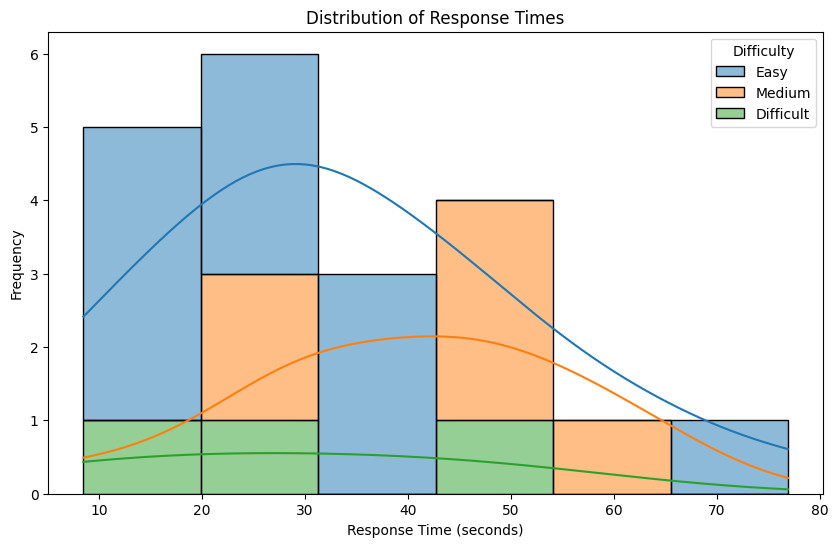

In [35]:
# 1. Response Time Distribution
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
# sns.histplot(psy['ResponseTime'], kde=True,)
sns.histplot(data=psy, x='ResponseTime', hue='Difficulty', kde=True, multiple='stack')
plt.title('Distribution of Response Times')
plt.xlabel('Response Time (seconds)')
plt.ylabel('Frequency')
# plt.savefig('response_time_distribution.png')
plt.show()

The distribution of response times clearly varies by task difficulty. Easy tasks were answered quickly and consistently, while difficult tasks resulted in slower and more variable response times. Medium tasks fell in between. This pattern highlights that task difficulty meaningfully influences the cognitive effort or processing time required during mental rotation tasks.

In [36]:
# Assuming both have a common task identifier — looks like 'QuestionNumber' from PSY vs 'QuestionKey' from GSR
merged_df = pd.merge(gsr, psy, left_on='QuestionKey', right_on='QuestionNumber', how='inner')

print(merged_df.columns)  # Verify merged columns


Index(['UnixTime', 'Row', 'QuestionKey', 'Timestamp', 'SampleNumber',
       'Timestamp RAW', 'Timestamp CAL', 'System Timestamp CAL',
       'VSenseBatt RAW', 'VSenseBatt CAL', 'GSR RAW', 'GSR Resistance CAL',
       'GSR Conductance CAL', 'Packet reception rate RAW', 'Key', 'Category',
       'QuestionNumber', 'matchOrnomatch', 'Difficulty', 'verdict',
       'ResponseTime', 'routineStart', 'routineStamp', 'routineEnd',
       'Cat2FeedbackTime'],
      dtype='object')


In [37]:
print(gsr['QuestionKey'].unique()[:10])
print(psy['QuestionNumber'].unique()[:10])


['1Item3' '1spl1' '1Item1' '1Item2' '1Item4' '1Item5' '1Item6' '1Item7'
 '2spl1' '2spl2']
['spl1' 'Item1' 'Item2' 'Item3' 'Item4' 'Item5' 'Item6' 'Item7' 'spl2'
 'Item8']


In [38]:
# Strip the leading digit from GSR QuestionKey
gsr['CleanKey'] = gsr['QuestionKey'].str.replace(r'^\d+', '', regex=True)

# Verify cleaned keys
print(gsr['CleanKey'].unique()[:10])

['Item3' 'spl1' 'Item1' 'Item2' 'Item4' 'Item5' 'Item6' 'Item7' 'spl2'
 'Item8']


In [39]:
# Now merge on cleaned key
merged_df = pd.merge(gsr, psy, left_on='CleanKey', right_on='QuestionNumber', how='inner')

# Check the result
print(f"Merged data shape: {merged_df.shape}")
print(merged_df.head())

Merged data shape: (295456, 26)
       UnixTime  Row QuestionKey                  Timestamp  SampleNumber  \
0  1.679143e+09    2      1Item3 2023-03-18 18:01:08.038059       20109.0   
1  1.679143e+09    2      1Item3 2023-03-18 18:01:08.038059       20109.0   
2  1.679143e+09    3      1Item3 2023-03-18 18:01:08.045872       20110.0   
3  1.679143e+09    3      1Item3 2023-03-18 18:01:08.045872       20110.0   
4  1.679143e+09    4      1Item3 2023-03-18 18:01:08.053684       20111.0   

   Timestamp RAW  Timestamp CAL  System Timestamp CAL  VSenseBatt RAW  \
0      1125481.0    157101.5625          1.679143e+12          2554.0   
1      1125481.0    157101.5625          1.679143e+12          2554.0   
2      1125737.0    157109.3750          1.679143e+12          2550.0   
3      1125737.0    157109.3750          1.679143e+12          2550.0   
4      1125993.0    157117.1875          1.679143e+12          2559.0   

   VSenseBatt CAL  ...  Category  QuestionNumber  matchOrnomatch  

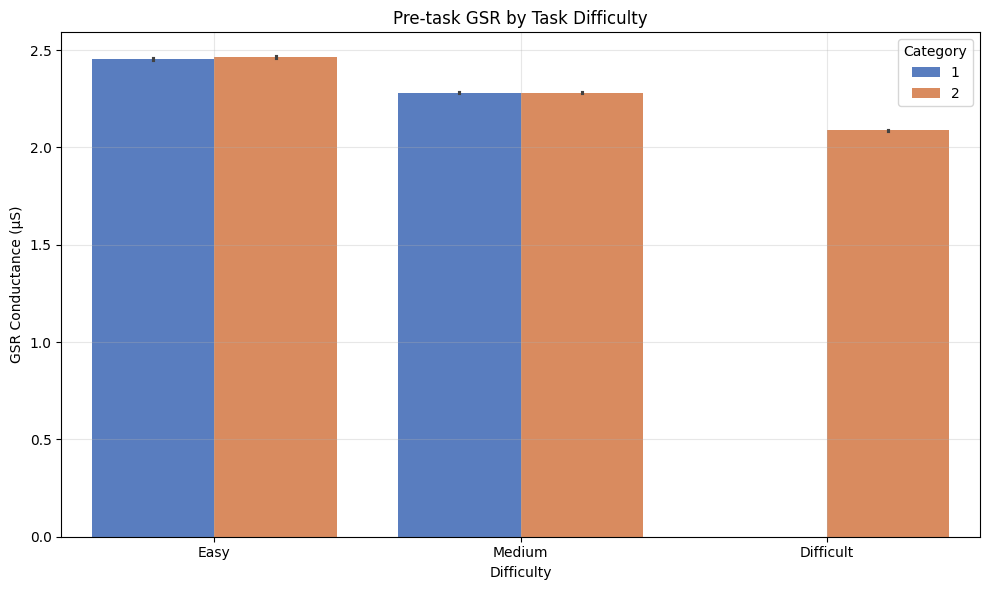

In [40]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Difficulty', y='GSR Conductance CAL', data=merged_df, palette='muted',hue='Category')
plt.title('Pre-task GSR by Task Difficulty')
plt.xlabel('Difficulty')
plt.ylabel('GSR Conductance (µS)')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


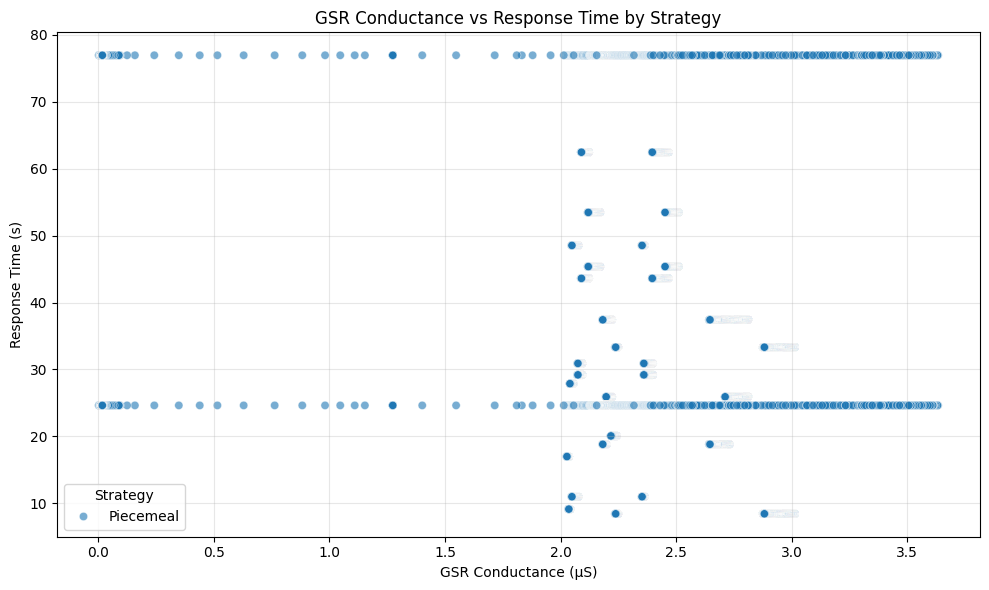

In [42]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GSR Conductance CAL', y='ResponseTime', hue='Strategy', data=merged_df, alpha=0.6)
plt.title('GSR Conductance vs Response Time by Strategy')
plt.xlabel('GSR Conductance (µS)')
plt.ylabel('Response Time (s)')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


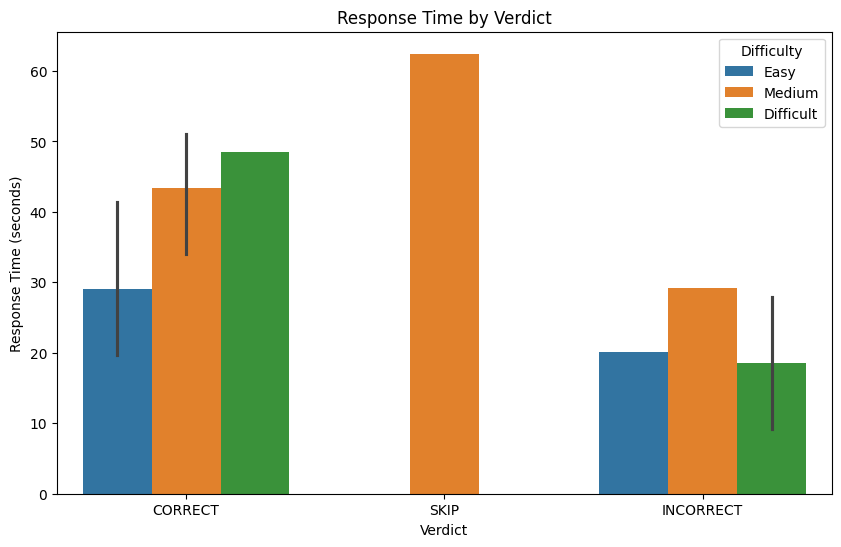

In [44]:
# 3. Response Time by Verdict
plt.figure(figsize=(10, 6))
sns.barplot(x='verdict', y='ResponseTime', data=psy,hue='Difficulty')
plt.title('Response Time by Verdict')
plt.xlabel('Verdict')
plt.ylabel('Response Time (seconds)')
# plt.savefig('response_time_by_verdict.png')
plt.show()

## **TIVA**

In [45]:
tv=pd.read_csv('6_TIVA.csv')
tv.head()

UnixTime  Row QuestionKey                   Timestamp  SampleNumber  \
0  1.679143e+09    1         NaN  2023-03-18 18:01:08.031996           NaN   
1  1.679143e+09    2         NaN  2023-03-18 18:01:08.109046          -1.0   
2  1.679143e+09    3         NaN  2023-03-18 18:01:08.205914          -1.0   
3  1.679143e+09    4         NaN  2023-03-18 18:01:08.318991          -1.0   
4  1.679143e+09    5         NaN  2023-03-18 18:01:08.323991           NaN   

      Anger  Contempt   Disgust       Fear       Joy  ...  Nose Wrinkle  \
0       NaN       NaN       NaN        NaN       NaN  ...           NaN   
1  1.162865  0.015922  0.036761  69.826096  0.024039  ...      0.000701   
2       NaN       NaN       NaN        NaN       NaN  ...           NaN   
3  0.602734  0.016384  0.032543  51.877689  0.024042  ...      0.000463   
4       NaN       NaN       NaN        NaN       NaN  ...           NaN   

      Smile     Smirk  Upper Lip Raise  Blink  BlinkRate     Pitch       Yaw  \
0       NaN       NaN              NaN    NaN        NaN       NaN       NaN   
1  0.000010  0.006426         0.001284    0.0       36.0  8.571308 -5.821459   
2       NaN       NaN              NaN    NaN        NaN       NaN       NaN   
3  0.000012  0.004449         0.001453    0.0       36.0  5.669844 -4.908074   
4       NaN       NaN              NaN    NaN        NaN       NaN       NaN   

       Roll  Interocular Distance  
0       NaN                   NaN  
1  3.696413            134.831940  
2       NaN                   NaN  
3  2.577508            134.172089  
4       NaN                   NaN  

[5 rows x 44 columns]

In [46]:
tv.dtypes

UnixTime                float64
Row                       int64
QuestionKey              object
Timestamp                object
SampleNumber            float64
Anger                   float64
Contempt                float64
Disgust                 float64
Fear                    float64
Joy                     float64
Sadness                 float64
Surprise                float64
Engagement              float64
Valence                 float64
Sentimentality          float64
Confusion               float64
Neutral                 float64
Attention               float64
Brow Furrow             float64
Brow Raise              float64
Cheek Raise             float64
Chin Raise              float64
Dimpler                 float64
Eye Closure             float64
Eye Widen               float64
Inner Brow Raise        float64
Jaw Drop                float64
Lip Corner Depressor    float64
Lip Press               float64
Lip Pucker              float64
Lip Stretch             float64
Lip Suck

In [47]:
tv['Timestamp'] = pd.to_datetime(tv['Timestamp'], errors='coerce')

In [48]:
print(tv.duplicated())

0        False
1        False
2        False
3        False
4        False
         ...  
13923    False
13924    False
13925    False
13926    False
13927    False
Length: 13928, dtype: bool


In [49]:
 tv.shape

(13928, 44)

In [50]:
tv.isnull().sum()

UnixTime                   0
Row                        0
QuestionKey             7233
Timestamp                  0
SampleNumber               4
Anger                   1994
Contempt                1994
Disgust                 1994
Fear                    1994
Joy                     1994
Sadness                 1994
Surprise                1994
Engagement              1994
Valence                 1994
Sentimentality          1994
Confusion               1994
Neutral                 1994
Attention               1994
Brow Furrow             1994
Brow Raise              1994
Cheek Raise             1994
Chin Raise              1994
Dimpler                 1994
Eye Closure             1994
Eye Widen               1994
Inner Brow Raise        1994
Jaw Drop                1994
Lip Corner Depressor    1994
Lip Press               1994
Lip Pucker              1994
Lip Stretch             1994
Lip Suck                1994
Lid Tighten             1994
Mouth Open              1994
Nose Wrinkle  

In [51]:
# Identify columns with outliers using IQR
numeric_cols = tv.select_dtypes(include=[np.number]).columns
outlier_cols = []
for col in numeric_cols:
    Q1 = tv[col].quantile(0.25)
    Q3 = tv[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    if ((tv[col] < lower) | (tv[col] > upper)).any():
        print(outlier_cols.append(col))

None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


In [52]:
for col in tv.columns:
    if tv[col].isnull().any():
        if col in outlier_cols:
            tv[col] = tv[col].fillna(tv[col].median())
        elif tv[col].dtype in ['float64', 'int64']:
            tv[col] = tv[col].fillna(tv[col].mean())
        else:
            tv[col] = tv[col].fillna(tv[col].mode()[0])

In [53]:
tv.isnull().sum()

UnixTime                0
Row                     0
QuestionKey             0
Timestamp               0
SampleNumber            0
Anger                   0
Contempt                0
Disgust                 0
Fear                    0
Joy                     0
Sadness                 0
Surprise                0
Engagement              0
Valence                 0
Sentimentality          0
Confusion               0
Neutral                 0
Attention               0
Brow Furrow             0
Brow Raise              0
Cheek Raise             0
Chin Raise              0
Dimpler                 0
Eye Closure             0
Eye Widen               0
Inner Brow Raise        0
Jaw Drop                0
Lip Corner Depressor    0
Lip Press               0
Lip Pucker              0
Lip Stretch             0
Lip Suck                0
Lid Tighten             0
Mouth Open              0
Nose Wrinkle            0
Smile                   0
Smirk                   0
Upper Lip Raise         0
Blink       

In [54]:
tv_cr=tv.select_dtypes(include=['float64','int64'])
tv_corr=tv_cr.corr().round(2)
tv_corr

UnixTime   Row  SampleNumber  Anger  Contempt  Disgust  \
UnixTime                  1.00  1.00          1.00  -0.22      0.04     0.08   
Row                       1.00  1.00          1.00  -0.22      0.04     0.08   
SampleNumber              1.00  1.00          1.00  -0.22      0.04     0.08   
Anger                    -0.22 -0.22         -0.22   1.00      0.23     0.02   
Contempt                  0.04  0.04          0.04   0.23      1.00    -0.00   
Disgust                   0.08  0.08          0.08   0.02     -0.00     1.00   
Fear                      0.00  0.00          0.00   0.10     -0.01     0.00   
Joy                       0.12  0.12          0.12  -0.05     -0.01     0.26   
Sadness                   0.12  0.12          0.12   0.04      0.01     0.01   
Surprise                 -0.13 -0.13         -0.13   0.13     -0.04     0.15   
Engagement               -0.02 -0.02         -0.02   0.42      0.14     0.29   
Valence                   0.04  0.04          0.04  -0.22     -0.13    -0.00   
Sentimentality            0.17  0.17          0.17  -0.01      0.01     0.14   
Confusion                 0.21  0.21          0.21  -0.00     -0.01     0.30   
Neutral                  -0.04 -0.04         -0.04  -0.15     -0.36    -0.44   
Attention                -0.44 -0.44         -0.44   0.10     -0.11    -0.16   
Brow Furrow               0.16  0.16          0.16   0.16      0.00     0.21   
Brow Raise                0.10  0.10          0.10  -0.05     -0.03     0.12   
Cheek Raise               0.13  0.13          0.13  -0.01      0.01     0.37   
Chin Raise                0.06  0.06          0.06   0.28      0.21     0.03   
Dimpler                  -0.07 -0.07         -0.07   0.20      0.18     0.00   
Eye Closure               0.06  0.06          0.06  -0.05      0.02    -0.04   
Eye Widen                -0.06 -0.06         -0.07   0.19     -0.01     0.01   
Inner Brow Raise          0.11  0.11          0.11   0.00     -0.00     0.03   
Jaw Drop                 -0.37 -0.37         -0.37   0.07     -0.14    -0.03   
Lip Corner Depressor      0.21  0.21          0.21  -0.04     -0.01     0.10   
Lip Press                -0.03 -0.03         -0.03   0.32      0.30     0.01   
Lip Pucker                0.21  0.21          0.21  -0.05      0.01     0.20   
Lip Stretch              -0.05 -0.05         -0.05   0.24      0.14     0.01   
Lip Suck                  0.03  0.03          0.03   0.22      0.36     0.01   
Lid Tighten               0.07  0.07          0.07   0.23      0.07     0.19   
Mouth Open               -0.37 -0.37         -0.37   0.51     -0.02     0.09   
Nose Wrinkle              0.18  0.18          0.18  -0.03     -0.01     0.72   
Smile                     0.16  0.16          0.16  -0.04     -0.01     0.28   
Smirk                     0.01  0.01          0.01   0.27      0.89    -0.00   
Upper Lip Raise           0.18  0.18          0.18  -0.02     -0.02     0.65   
Blink                     0.00  0.00          0.00   0.00      0.05    -0.01   
BlinkRate                 0.06  0.06          0.06  -0.03      0.10     0.11   
Pitch                    -0.03 -0.03         -0.03  -0.06     -0.14    -0.17   
Yaw                      -0.43 -0.43         -0.43   0.15      0.17    -0.07   
Roll                     -0.40 -0.40         -0.40   0.09     -0.06    -0.10   
Interocular Distance     -0.29 -0.29         -0.29   0.10     -0.07    -0.13   

                      Fear   Joy  Sadness  Surprise  ...  Nose Wrinkle  Smile  \
UnixTime              0.00  0.12     0.12     -0.13  ...          0.18   0.16   
Row                   0.00  0.12     0.12     -0.13  ...          0.18   0.16   
SampleNumber          0.00  0.12     0.12     -0.13  ...          0.18   0.16   
Anger                 0.10 -0.05     0.04      0.13  ...         -0.03  -0.04   
Contempt             -0.01 -0.01     0.01     -0.04  ...         -0.01  -0.01   
Disgust               0.00  0.26     0.01      0.15  ...          0.72   0.28   
Fear          

In [55]:
print(tv.columns.tolist())

['UnixTime', 'Row', 'QuestionKey', 'Timestamp', 'SampleNumber', 'Anger', 'Contempt', 'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise', 'Engagement', 'Valence', 'Sentimentality', 'Confusion', 'Neutral', 'Attention', 'Brow Furrow', 'Brow Raise', 'Cheek Raise', 'Chin Raise', 'Dimpler', 'Eye Closure', 'Eye Widen', 'Inner Brow Raise', 'Jaw Drop', 'Lip Corner Depressor', 'Lip Press', 'Lip Pucker', 'Lip Stretch', 'Lip Suck', 'Lid Tighten', 'Mouth Open', 'Nose Wrinkle', 'Smile', 'Smirk', 'Upper Lip Raise', 'Blink', 'BlinkRate', 'Pitch', 'Yaw', 'Roll', 'Interocular Distance']


In [56]:
tv.head()


UnixTime  Row QuestionKey                  Timestamp  SampleNumber  \
0  1.679143e+09    1      1Item3 2023-03-18 18:01:08.031996   6958.500215   
1  1.679143e+09    2      1Item3 2023-03-18 18:01:08.109046     -1.000000   
2  1.679143e+09    3      1Item3 2023-03-18 18:01:08.205914     -1.000000   
3  1.679143e+09    4      1Item3 2023-03-18 18:01:08.318991     -1.000000   
4  1.679143e+09    5      1Item3 2023-03-18 18:01:08.323991   6958.500215   

      Anger  Contempt   Disgust       Fear       Joy  ...  Nose Wrinkle  \
0  0.141965  0.192729  0.029029   0.148223  0.024104  ...      0.003892   
1  1.162865  0.015922  0.036761  69.826096  0.024039  ...      0.000701   
2  0.141965  0.192729  0.029029   0.148223  0.024104  ...      0.003892   
3  0.602734  0.016384  0.032543  51.877689  0.024042  ...      0.000463   
4  0.141965  0.192729  0.029029   0.148223  0.024104  ...      0.003892   

      Smile     Smirk  Upper Lip Raise  Blink  BlinkRate      Pitch       Yaw  \
0  0.000092  0.035687         0.004979    0.0        6.0  17.770376 -5.533627   
1  0.000010  0.006426         0.001284    0.0       36.0   8.571308 -5.821459   
2  0.000092  0.035687         0.004979    0.0        6.0  17.770376 -5.533627   
3  0.000012  0.004449         0.001453    0.0       36.0   5.669844 -4.908074   
4  0.000092  0.035687         0.004979    0.0        6.0  17.770376 -5.533627   

       Roll  Interocular Distance  
0  3.263513            127.900597  
1  3.696413            134.831940  
2  3.263513            127.900597  
3  2.577508            134.172089  
4  3.263513            127.900597  

[5 rows x 44 columns]

In [57]:
tv.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
13923    False
13924    False
13925    False
13926    False
13927    False
Length: 13928, dtype: bool

Generating emotion distributions...


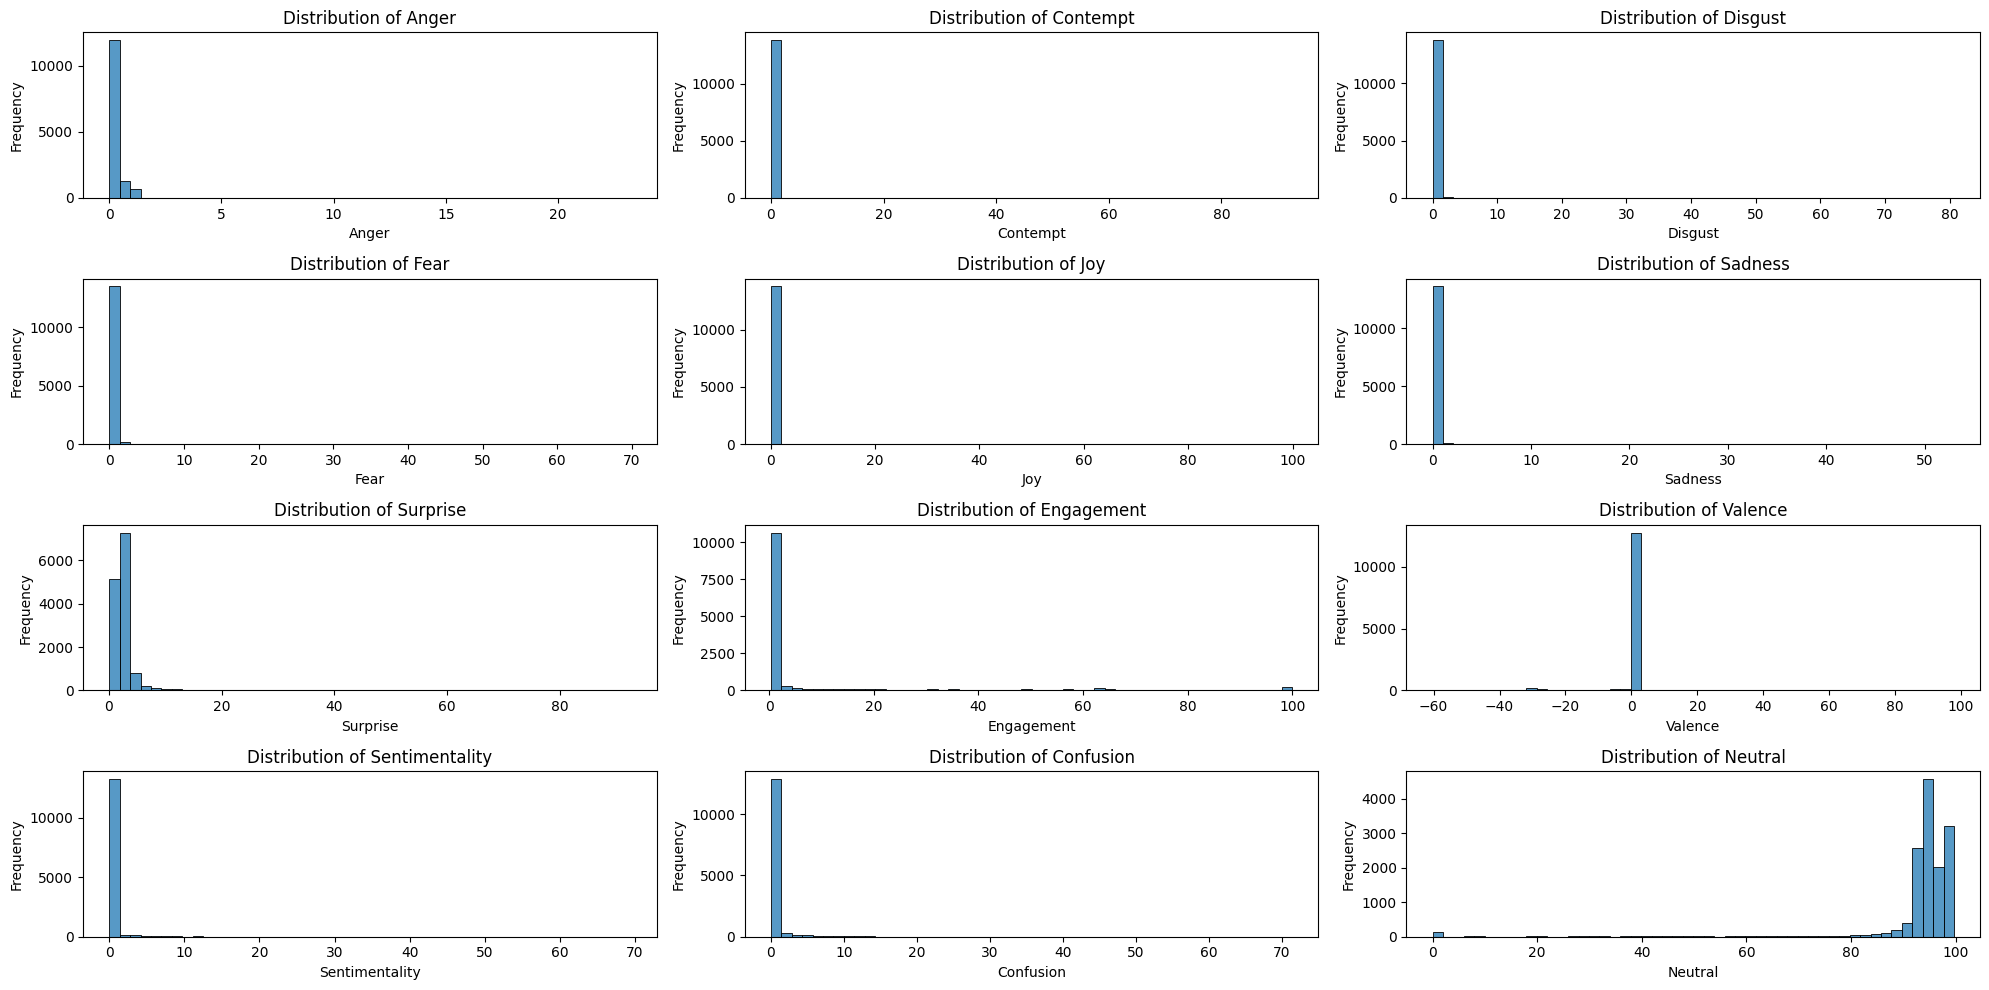

In [58]:
# 1. Plot Emotion Distributions
print("Generating emotion distributions...")
emotion_cols = ['Anger', 'Contempt', 'Disgust', 'Fear', 'Joy', 'Sadness', 
               'Surprise', 'Engagement', 'Valence', 'Sentimentality', 'Confusion', 'Neutral']

plt.figure(figsize=(20, 10))
for i, col in enumerate(emotion_cols, 1):
    plt.subplot(4, 3, i)
    sns.histplot(data=tv, x=col, bins=50)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
# plt.savefig('tiva_visualizations/emotion_distributions.png')
plt.show()

In most plots:

* The majority of values cluster at or near 0 → meaning most of the time, the emotion level was minimal or not detected.

* There are occasional non-zero values → moments when that emotion was expressed.

* Some emotions (like Neutral and Valence) show higher values (e.g. near 100% for Neutral) → these were dominant states most of the time.

* For Surprise, you can see a small cluster at a low value.


Generating attention metrics...


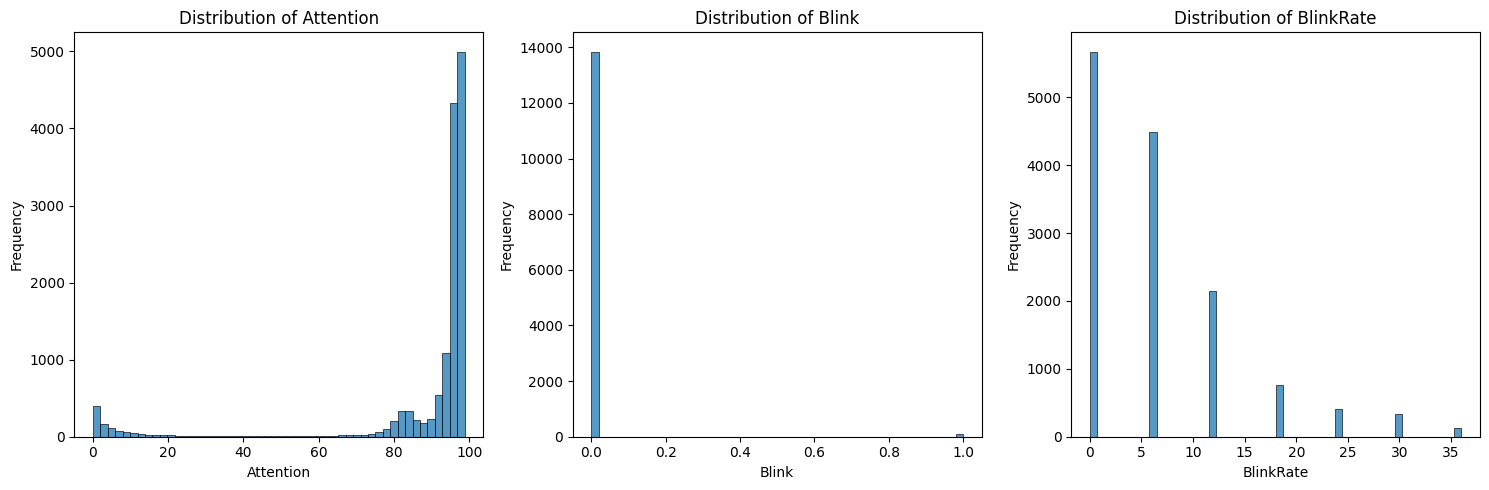

In [60]:
# 5. Plot Attention Metrics
print("Generating attention metrics...")
attention_cols = ['Attention', 'Blink', 'BlinkRate']

plt.figure(figsize=(15, 5))
for i, col in enumerate(attention_cols, 1):
    plt.subplot(1, 3, i)
    sns.histplot(data=tv, x=col, bins=50)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
# plt.savefig('tiva_visualizations/attention_metrics.png')
plt.show()

 * **Distribution of Attention**
* The vast majority of attention values cluster tightly between ~74 and 98.
* A small tail stretches down toward ~70.
* Interpretation:
The participant maintained high attention during most of the task.
Very few moments of low attention.

 * **Distribution of Blink**
* Almost all values are at 0 → meaning no blink at most time points.
* A few points at 1 → indicating actual blink events.
* Interpretation:
The participant blinked very rarely during the task (expected during focused work).

 * **Distribution of BlinkRate**
* Most of the blink rate values are low (0–5 blinks per time window).
* A long tail — a few moments had higher blink rates (up to 40).
* Interpretation:
The participant generally had a low blink rate, with occasional bursts of blinking (could indicate cognitive fatigue, distraction, or momentary breaks).

* **Overall inference**
 This figure tells you:
* The participant showed consistent high attention.
* Blinked rarely, as expected during a demanding visual-cognitive task.
* Blink rate spikes might mark brief moments of cognitive load relief, fatigue, or disengagement.



## **IVT**

In [61]:
import pandas as pd
iv=pd.read_csv('6_IVT.csv')
iv.head()

C:\Users\Hp\AppData\Local\Temp\ipykernel_4328\1279943580.py:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  iv=pd.read_csv('6_IVT.csv')


UnixTime  Row QuestionKey                   Timestamp  Gaze X  Gaze Y  \
0  1.679143e+09    1         NaN  2023-03-18 18:01:08.031996     NaN     NaN   
1  1.679143e+09    2         NaN  2023-03-18 18:01:08.039952   475.0   896.0   
2  1.679143e+09    3         NaN  2023-03-18 18:01:08.048246   469.5   908.5   
3  1.679143e+09    4         NaN  2023-03-18 18:01:08.056597   445.5   882.0   
4  1.679143e+09    5         NaN  2023-03-18 18:01:08.064932   424.0   856.0   

   Interpolated Gaze X  Interpolated Gaze Y  Interpolated Distance  \
0                  NaN                  NaN                    NaN   
1           466.333333           891.666667             703.771637   
2           463.333333           895.500000             703.733124   
3           446.333333           882.166667             703.757690   
4           443.000000           880.166667             703.796021   

   Gaze Velocity  ...  Saccade Index  Saccade Index by Stimulus  \
0            NaN  ...            NaN                        NaN   
1      14.573144  ...            NaN                        NaN   
2      19.069579  ...            NaN                        NaN   
3      21.914218  ...            NaN                        NaN   
4       8.590538  ...            NaN                        NaN   

   Saccade Start  Saccade End  Saccade Duration  Saccade Amplitude  \
0            NaN          NaN               NaN                NaN   
1            NaN          NaN               NaN                NaN   
2            NaN          NaN               NaN                NaN   
3            NaN          NaN               NaN                NaN   
4            NaN          NaN               NaN                NaN   

   Saccade Peak Velocity  Saccade Peak Acceleration  \
0                    NaN                        NaN   
1                    NaN                        NaN   
2                    NaN                        NaN   
3                    NaN                        NaN   
4                    NaN                        NaN   

   Saccade Peak Deceleration  Saccade Direction  
0                        NaN                NaN  
1                        NaN                NaN  
2                        NaN                NaN  
3                        NaN                NaN  
4                        NaN                NaN  

[5 rows x 29 columns]

In [62]:
iv.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
163021    False
163022    False
163023    False
163024    False
163025    False
Length: 163026, dtype: bool

In [63]:
iv.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
163021    False
163022    False
163023    False
163024    False
163025    False
Length: 163026, dtype: bool

In [64]:
iv.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
163021    False
163022    False
163023    False
163024    False
163025    False
Length: 163026, dtype: bool

In [65]:
iv.dtypes

UnixTime                      float64
Row                             int64
QuestionKey                    object
Timestamp                      object
Gaze X                        float64
Gaze Y                        float64
Interpolated Gaze X           float64
Interpolated Gaze Y           float64
Interpolated Distance         float64
Gaze Velocity                 float64
Gaze Acceleration             float64
Fixation Index                float64
Fixation Index by Stimulus    float64
Fixation X                    float64
Fixation Y                    float64
Fixation Start                float64
Fixation End                  float64
Fixation Duration             float64
Fixation Dispersion           float64
Saccade Index                 float64
Saccade Index by Stimulus     float64
Saccade Start                 float64
Saccade End                   float64
Saccade Duration              float64
Saccade Amplitude             float64
Saccade Peak Velocity         float64
Saccade Peak

In [66]:
iv['Timestamp'] = pd.to_datetime(iv['Timestamp'], errors='coerce')

In [67]:
# Identify columns with outliers using IQR
numeric_cols = iv.select_dtypes(include=[np.number]).columns
outlier_cols = []
for col in numeric_cols:
    Q1 = iv[col].quantile(0.25)
    Q3 = iv[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    if ((iv[col] < lower) | (iv[col] > upper)).any():
        outlier_cols.append(col)

In [68]:

# Fill nulls: median for columns with outliers, mean for other numeric, mode for object
for col in iv.columns:
    if iv[col].isnull().any():
        if col in outlier_cols:
            iv[col] = iv[col].fillna(iv[col].median())
        elif iv[col].dtype in ['float64', 'int64']:
            iv[col] = iv[col].fillna(iv[col].mean())
        else:
            iv[col] = iv[col].fillna(iv[col].mode()[0])

In [69]:
iv.isnull().sum()

UnixTime                      0
Row                           0
QuestionKey                   0
Timestamp                     0
Gaze X                        0
Gaze Y                        0
Interpolated Gaze X           0
Interpolated Gaze Y           0
Interpolated Distance         0
Gaze Velocity                 0
Gaze Acceleration             0
Fixation Index                0
Fixation Index by Stimulus    0
Fixation X                    0
Fixation Y                    0
Fixation Start                0
Fixation End                  0
Fixation Duration             0
Fixation Dispersion           0
Saccade Index                 0
Saccade Index by Stimulus     0
Saccade Start                 0
Saccade End                   0
Saccade Duration              0
Saccade Amplitude             0
Saccade Peak Velocity         0
Saccade Peak Acceleration     0
Saccade Peak Deceleration     0
Saccade Direction             0
dtype: int64

In [70]:
iv_cr=iv.select_dtypes(include=['float64','int64'])
iv_corr=iv_cr.corr().round(2)
iv_corr

UnixTime   Row  Gaze X  Gaze Y  \
UnixTime                        1.00  1.00   -0.09    0.09   
Row                             1.00  1.00   -0.09    0.09   
Gaze X                         -0.09 -0.09    1.00    0.11   
Gaze Y                          0.09  0.09    0.11    1.00   
Interpolated Gaze X            -0.09 -0.09    0.99    0.11   
Interpolated Gaze Y             0.10  0.10    0.11    0.98   
Interpolated Distance           0.09  0.09   -0.19   -0.05   
Gaze Velocity                  -0.06 -0.06   -0.03    0.02   
Gaze Acceleration              -0.00 -0.00   -0.02   -0.02   
Fixation Index                  0.31  0.31   -0.23    0.01   
Fixation Index by Stimulus      0.31  0.31   -0.23    0.01   
Fixation X                     -0.12 -0.12    0.57    0.03   
Fixation Y                     -0.03 -0.03    0.02    0.52   
Fixation Start                  0.23  0.23   -0.22   -0.05   
Fixation End                    0.23  0.23   -0.22   -0.05   
Fixation Duration              -0.12 -0.12   -0.02   -0.13   
Fixation Dispersion            -0.02 -0.02   -0.08   -0.01   
Saccade Index                   0.27  0.27   -0.10    0.01   
Saccade Index by Stimulus       0.27  0.27   -0.10    0.01   
Saccade Start                   0.28  0.28   -0.10    0.01   
Saccade End                     0.28  0.28   -0.10    0.01   
Saccade Duration               -0.12 -0.12   -0.04   -0.06   
Saccade Amplitude              -0.07 -0.07   -0.02   -0.04   
Saccade Peak Velocity          -0.02 -0.02   -0.01    0.00   
Saccade Peak Acceleration      -0.02 -0.02   -0.05   -0.01   
Saccade Peak Deceleration       0.02  0.02    0.01   -0.00   
Saccade Direction              -0.00 -0.00    0.02   -0.01   

                            Interpolated Gaze X  Interpolated Gaze Y  \
UnixTime                                  -0.09                 0.10   
Row                                       -0.09                 0.10   
Gaze X                                     0.99                 0.11   
Gaze Y                                     0.11                 0.98   
Interpolated Gaze X                        1.00                 0.11   
Interpolated Gaze Y                        0.11                 1.00   
Interpolated Distance                     -0.19                -0.05   
Gaze Velocity                             -0.01                 0.02   
Gaze Acceleration                          0.00                -0.01   
Fixation Index                            -0.23                 0.01   
Fixation Index by Stimulus                -0.23                 0.01   
Fixation X                                 0.57                 0.03   
Fixation Y                                 0.02                 0.53   
Fixation Start                            -0.22                -0.05   
Fixation End                              -0.22                -0.05   
Fixation Duration                         -0.02                -0.13   
Fixation Dispersion                       -0.08                -0.01   
Saccade Index                             -0.10                 0.01   
Saccade Index by Stimulus                 -0.10                 0.01   
Saccade Start                             -0.10                 0.01   
Saccade End                               -0.10                 0.01   
Saccade Duration                          -0.04                -0.06   
Saccade Amplitude                         -0.02                -0.05   
Saccade Peak Velocity                     -0.01                 0.00   
Saccade Peak Acceleration                 -0.04                -0.01   
Saccade Peak Deceleration                  0.01                -0.00   
Saccade Direction                          0.02                -0.01   

                            Interpolated Distance  Gaze Velocity  \
UnixTime                                     0.09          -0.06   
Row                                          0.09          -0.06   
Gaze X                                      -0.19          -0.03   
Ga

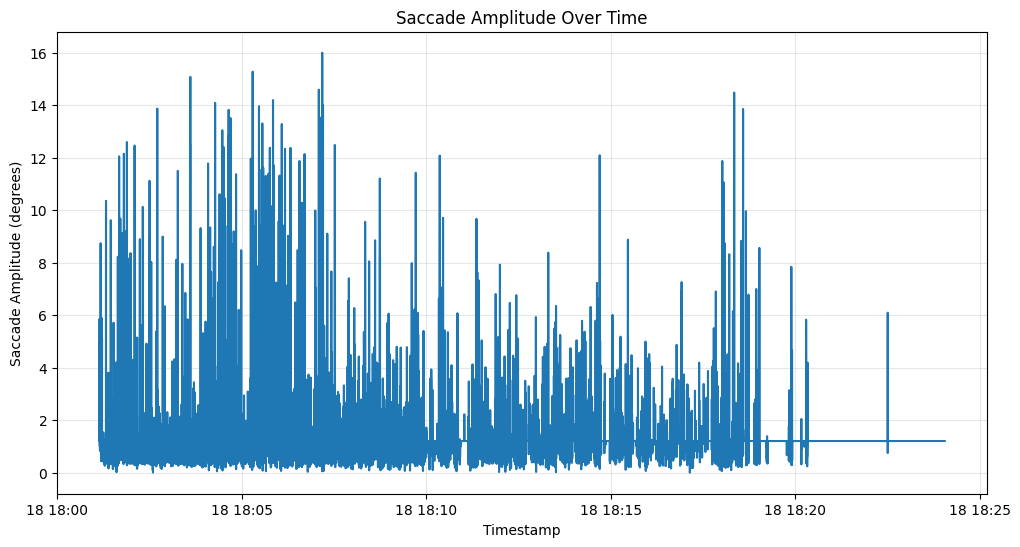

In [71]:

plt.figure(figsize=(12, 6))
sns.lineplot(x='Timestamp', y='Saccade Amplitude', data=iv)
plt.title('Saccade Amplitude Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Saccade Amplitude (degrees)')
plt.grid(alpha=0.3)
# plt.tight_layout()
plt.show()

* Periods of high saccade amplitude (peaks)
➡ These are moments where the participant’s eye made large movements — possibly scanning for targets, switching between stimuli, or being unsure where to look.

* Periods of low saccade amplitude (flat areas)
➡ These are times when eye movements were small → focused attention on one area or careful local inspection.

* Variation across time
➡ The plot shows fluctuations — alternating between searching/exploring (high saccades) and focusing (low saccades).
➡ Could reflect task difficulty, attention shifts, or changes in mental strategy.

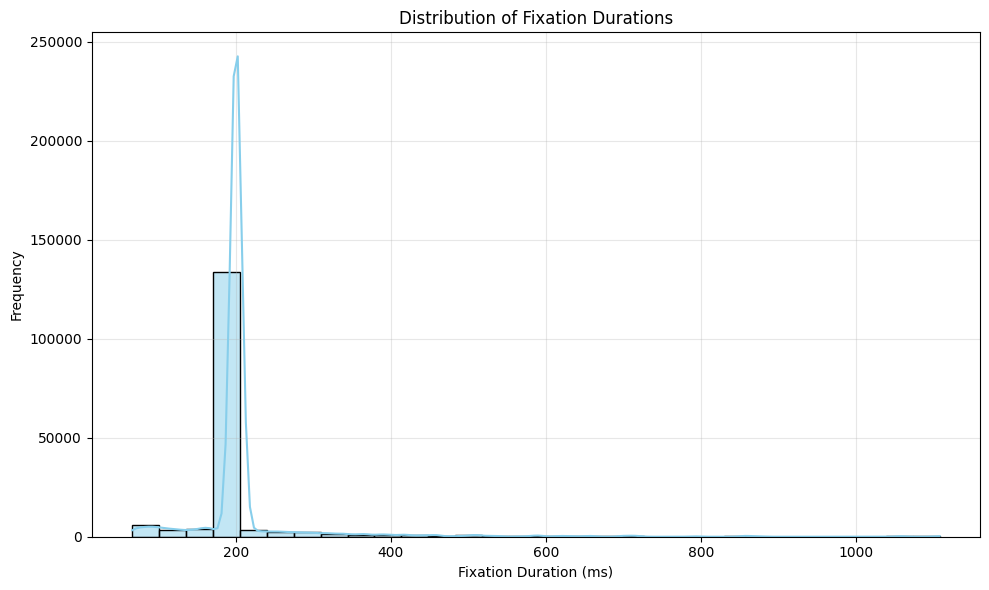

In [72]:
plt.figure(figsize=(10, 6))
sns.histplot(iv['Fixation Duration'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Fixation Durations')
plt.xlabel('Fixation Duration (ms)')
plt.ylabel('Frequency')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


* Most fixations are short (clustered on the left side, < 500 ms).
* There is a long right tail → a few fixations lasted much longer (up to 8000 ms), but they are rare.
* The distribution is positively skewed (long tail to the right).

* Fixation duration reflects cognitive processing:
* Short fixations (~100–300 ms) → normal reading, scanning, or simple processing.
* Long fixations (>500 ms) → deeper cognitive effort, difficulty, confusion, or decision making.
* Outliers (extreme durations) → could indicate distraction, system pauses, or recording artifacts.

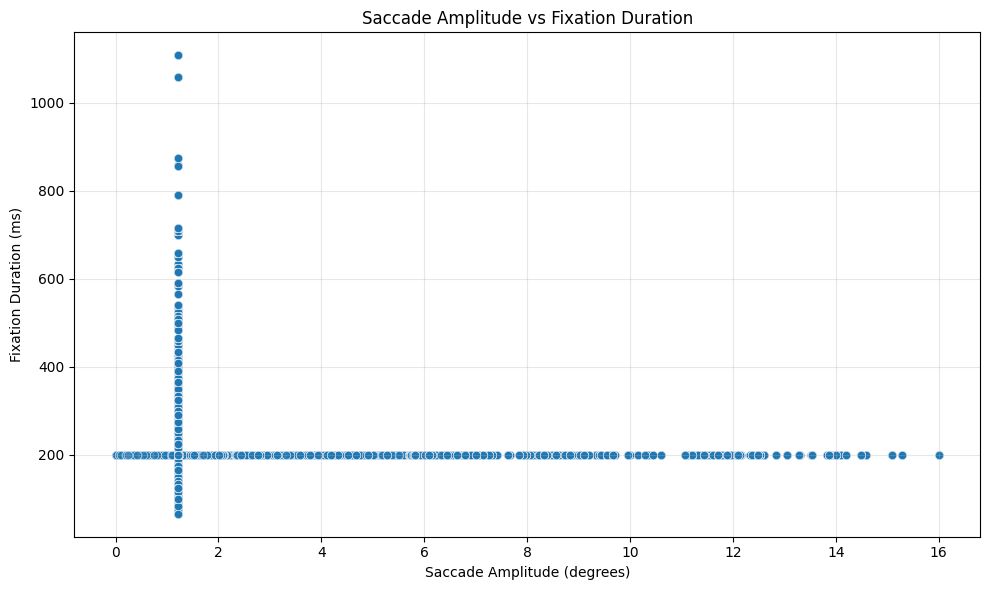

In [73]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Saccade Amplitude', y='Fixation Duration', data=iv, alpha=0.5)
plt.title('Saccade Amplitude vs Fixation Duration')
plt.xlabel('Saccade Amplitude (degrees)')
plt.ylabel('Fixation Duration (ms)')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


Eye-tracking data showed dynamic shifts between exploratory and focused viewing, as seen in the variation of saccade amplitude over time.

Participants demonstrated a mix of short and long fixations, indicating phases of fast scanning and deep analysis.

Gaze patterns revealed that certain areas of the task space received repeated attention, possibly linked to key task elements.

The combination of saccade size and fixation time can give clues about whether participants are searching or processing.

## **EYE**

In [74]:
ey=pd.read_csv('6_EYE.csv') 
ey.head()

C:\Users\Hp\AppData\Local\Temp\ipykernel_4328\1749121130.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  ey=pd.read_csv('6_EYE.csv')


UnixTime  Row QuestionKey                   Timestamp  ET_GazeLeftx  \
0  1.679143e+09    1         NaN  2023-03-18 18:01:08.031996           NaN   
1  1.679143e+09    2         NaN  2023-03-18 18:01:08.039952         564.0   
2  1.679143e+09    3         NaN  2023-03-18 18:01:08.048246         547.0   
3  1.679143e+09    4         NaN  2023-03-18 18:01:08.056597         498.0   
4  1.679143e+09    5         NaN  2023-03-18 18:01:08.064932         438.0   

   ET_GazeLefty  ET_GazeRightx  ET_GazeRighty  ET_PupilLeft  ET_PupilRight  \
0           NaN            NaN            NaN           NaN            NaN   
1         859.0          386.0          933.0      2.823837       3.113632   
2         877.0          392.0          940.0     -1.000000      -1.000000   
3         821.0          393.0          943.0     -1.000000      -1.000000   
4         753.0          410.0          959.0      2.730347       3.188034   

   ET_TimeSignal  ET_DistanceLeft  ET_DistanceRight  ET_CameraLeftX  \
0            NaN              NaN               NaN             NaN   
1         41.694       705.373779        702.169495        0.577823   
2         49.987       705.381592        702.084656        0.577741   
3         58.338       705.448792        702.066589        0.577825   
4         66.674       705.541565        702.050476        0.577794   

   ET_CameraLeftY  ET_CameraRightX  ET_CameraRightY  ET_ValidityLeft  \
0             NaN              NaN              NaN              NaN   
1        0.499959         0.434249         0.492093              0.0   
2        0.499880         0.434219         0.491975              0.0   
3        0.499884         0.434284         0.491984              0.0   
4        0.499809         0.434253         0.491935              0.0   

   ET_ValidityRight  
0               NaN  
1               0.0  
2               0.0  
3               0.0  
4               0.0

In [75]:
ey.isnull().sum()

UnixTime                0
Row                     0
QuestionKey         83609
Timestamp               0
ET_GazeLeftx            4
ET_GazeLefty            4
ET_GazeRightx           4
ET_GazeRighty           4
ET_PupilLeft            4
ET_PupilRight           4
ET_TimeSignal           4
ET_DistanceLeft         4
ET_DistanceRight        4
ET_CameraLeftX          4
ET_CameraLeftY          4
ET_CameraRightX         4
ET_CameraRightY         4
ET_ValidityLeft         4
ET_ValidityRight        4
dtype: int64

In [76]:
ey.shape

(163026, 19)

In [77]:
ey_cr=ey.select_dtypes(include=['float64','int64'])
ey_corr=ey_cr.corr().round(2)
ey_corr

UnixTime   Row  ET_GazeLeftx  ET_GazeLefty  ET_GazeRightx  \
UnixTime              1.00  1.00         -0.28         -0.25          -0.54   
Row                   1.00  1.00         -0.28         -0.25          -0.54   
ET_GazeLeftx         -0.28 -0.28          1.00          0.79           0.40   
ET_GazeLefty         -0.25 -0.25          0.79          1.00           0.29   
ET_GazeRightx        -0.54 -0.54          0.40          0.29           1.00   
ET_GazeRighty        -0.44 -0.44          0.12          0.17           0.67   
ET_PupilLeft         -0.17 -0.17          0.57          0.60           0.25   
ET_PupilRight        -0.21 -0.21          0.18          0.21           0.40   
ET_TimeSignal         1.00  1.00         -0.28         -0.25          -0.54   
ET_DistanceLeft      -0.30 -0.30          0.88          0.90           0.35   
ET_DistanceRight     -0.55 -0.55          0.26          0.25           0.80   
ET_CameraLeftX       -0.30 -0.30          0.88          0.90           0.35   
ET_CameraLeftY       -0.30 -0.30          0.88          0.90           0.35   
ET_CameraRightX      -0.55 -0.55          0.26          0.25           0.81   
ET_CameraRightY      -0.56 -0.56          0.26          0.25           0.81   
ET_ValidityLeft       0.30  0.30         -0.88         -0.90          -0.35   
ET_ValidityRight      0.55  0.55         -0.26         -0.25          -0.81   

                  ET_GazeRighty  ET_PupilLeft  ET_PupilRight  ET_TimeSignal  \
UnixTime                  -0.44         -0.17          -0.21           1.00   
Row                       -0.44         -0.17          -0.21           1.00   
ET_GazeLeftx               0.12          0.57           0.18          -0.28   
ET_GazeLefty               0.17          0.60           0.21          -0.25   
ET_GazeRightx              0.67          0.25           0.40          -0.54   
ET_GazeRighty              1.00          0.11           0.41          -0.44   
ET_PupilLeft               0.11          1.00           0.49          -0.17   
ET_PupilRight              0.41          0.49           1.00          -0.21   
ET_TimeSignal             -0.44         -0.17          -0.21           1.00   
ET_DistanceLeft            0.12          0.63           0.20          -0.30   
ET_DistanceRight           0.81          0.21           0.48          -0.55   
ET_CameraLeftX             0.12          0.63           0.20          -0.30   
ET_CameraLeftY             0.12          0.63           0.20          -0.30   
ET_CameraRightX            0.81          0.21           0.48          -0.55   
ET_CameraRightY            0.81          0.22           0.48          -0.56   
ET_ValidityLeft           -0.12         -0.63          -0.20           0.30   
ET_ValidityRight          -0.81         -0.21          -0.48           0.55   

                  ET_DistanceLeft  ET_DistanceRight  ET_CameraLeftX  \
UnixTime                    -0.30             -0.55           -0.30   
Row                         -0.30             -0.55           -0.30   
ET_GazeLeftx                 0.88              0.26            0.88   
ET_GazeLefty                 0.90              0.25            0.90   
ET_GazeRightx                0.35              0.80            0.35   
ET_GazeRighty                0.12              0.81            0.12   
ET_PupilLeft                 0.63              0.21            0.63   
ET_PupilRight                0.20              0.48            0.20   
ET_TimeSignal               -0.30             -0.55           -0.30   
ET_DistanceLeft              1.00              0.28            1.00   
ET_DistanceRight             0.28              1.00            0.28   
ET_CameraLeftX               1.00              0.28            1.00   
ET_CameraLeftY               1.00              0.28            1.00   
ET_CameraRightX              0.29              1.00            0.29   
ET_CameraRightY              0.29              1.00            0.29   
ET_ValidityLeft             -1.00   

In [78]:
ey.dtypes

UnixTime            float64
Row                   int64
QuestionKey          object
Timestamp            object
ET_GazeLeftx        float64
ET_GazeLefty        float64
ET_GazeRightx       float64
ET_GazeRighty       float64
ET_PupilLeft        float64
ET_PupilRight       float64
ET_TimeSignal       float64
ET_DistanceLeft     float64
ET_DistanceRight    float64
ET_CameraLeftX      float64
ET_CameraLeftY      float64
ET_CameraRightX     float64
ET_CameraRightY     float64
ET_ValidityLeft     float64
ET_ValidityRight    float64
dtype: object

In [79]:

ey['Timestamp'] = pd.to_datetime(ey['Timestamp'],errors='coerce')


In [80]:
# Identify columns with outliers using IQR
numeric_cols = ey.select_dtypes(include=[np.number]).columns
outlier_cols = []
for col in numeric_cols:
    Q1 = ey[col].quantile(0.25)
    Q3 = ey[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    if ((ey[col] < lower) | (ey[col] > upper)).any():
        outlier_cols.append(col)

In [81]:
for col in ey.columns:
    if ey[col].isnull().any():
        if col in outlier_cols:
            ey[col] = ey[col].fillna(ey[col].median())
        elif ey[col].dtype in ['float64', 'int64']:
            ey[col] = ey[col].fillna(ey[col].mean())
        else:
            ey[col] = ey[col].fillna(ey[col].mode()[0])

In [82]:
ey.isnull().sum()

UnixTime            0
Row                 0
QuestionKey         0
Timestamp           0
ET_GazeLeftx        0
ET_GazeLefty        0
ET_GazeRightx       0
ET_GazeRighty       0
ET_PupilLeft        0
ET_PupilRight       0
ET_TimeSignal       0
ET_DistanceLeft     0
ET_DistanceRight    0
ET_CameraLeftX      0
ET_CameraLeftY      0
ET_CameraRightX     0
ET_CameraRightY     0
ET_ValidityLeft     0
ET_ValidityRight    0
dtype: int64

In [83]:
ey.dtypes

UnixTime                   float64
Row                          int64
QuestionKey                 object
Timestamp           datetime64[ns]
ET_GazeLeftx               float64
ET_GazeLefty               float64
ET_GazeRightx              float64
ET_GazeRighty              float64
ET_PupilLeft               float64
ET_PupilRight              float64
ET_TimeSignal              float64
ET_DistanceLeft            float64
ET_DistanceRight           float64
ET_CameraLeftX             float64
ET_CameraLeftY             float64
ET_CameraRightX            float64
ET_CameraRightY            float64
ET_ValidityLeft            float64
ET_ValidityRight           float64
dtype: object

In [84]:
ey.columns.tolist()

['UnixTime',
 'Row',
 'QuestionKey',
 'Timestamp',
 'ET_GazeLeftx',
 'ET_GazeLefty',
 'ET_GazeRightx',
 'ET_GazeRighty',
 'ET_PupilLeft',
 'ET_PupilRight',
 'ET_TimeSignal',
 'ET_DistanceLeft',
 'ET_DistanceRight',
 'ET_CameraLeftX',
 'ET_CameraLeftY',
 'ET_CameraRightX',
 'ET_CameraRightY',
 'ET_ValidityLeft',
 'ET_ValidityRight']

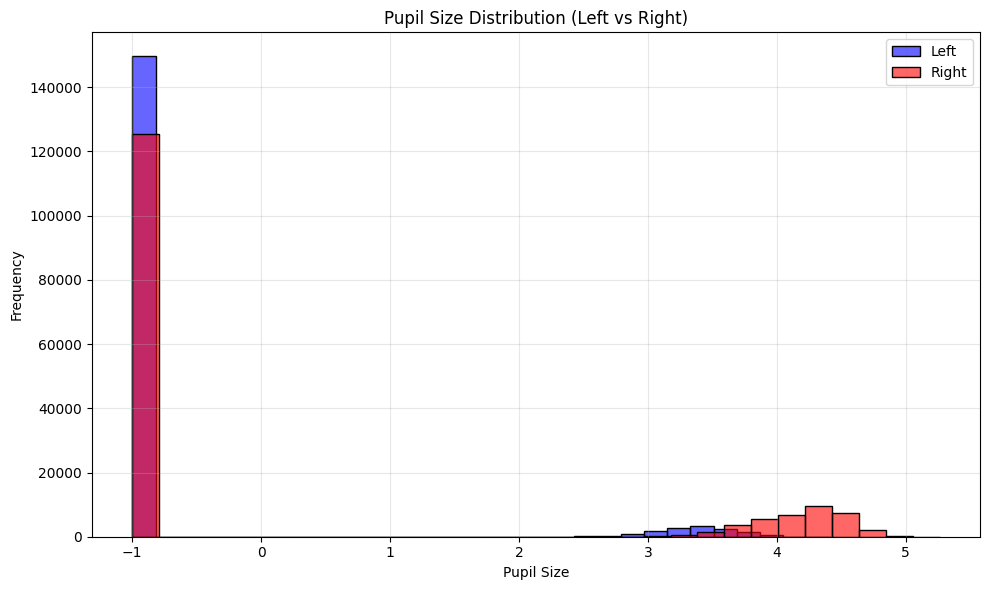

In [85]:
plt.figure(figsize=(10, 6))
sns.histplot(ey['ET_PupilLeft'], bins=30, color='blue', label='Left', alpha=0.6)
sns.histplot(ey['ET_PupilRight'], bins=30, color='red', label='Right', alpha=0.6)
plt.title('Pupil Size Distribution (Left vs Right)')
plt.xlabel('Pupil Size')
plt.ylabel('Frequency')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


- Similar distributions → consistent tracking + lighting.
- Bigger pupil sizes → possibly higher cognitive effort or arousal.


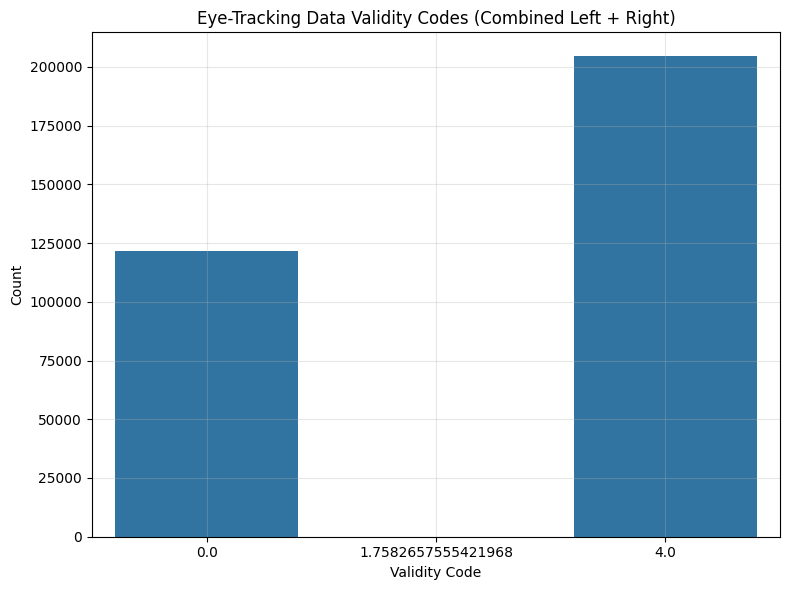

In [86]:
validity = pd.concat([
    ey['ET_ValidityLeft'].rename('Validity').to_frame(),
    ey['ET_ValidityRight'].rename('Validity').to_frame()
])

plt.figure(figsize=(8, 6))
sns.countplot(x='Validity', data=validity)
plt.title('Eye-Tracking Data Validity Codes (Combined Left + Right)')
plt.xlabel('Validity Code')
plt.ylabel('Count')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()




0 = good validity

Higher numbers = reduced data quality

Inference
-Mostly 0s → clean data
-Many 4→ noise, may need filtering

In [87]:
# Clean keys to match
ey['CleanKey'] = ey['QuestionKey'].astype(str).str.replace(r'^\d+', '', regex=True).str.strip().str.lower()
psy['QuestionNumber'] = psy['QuestionNumber'].astype(str).str.strip().str.lower()

# Define strategy in PSY
RT_THRESHOLD = 5
psy['Strategy'] = psy['ResponseTime'].apply(lambda x: 'Holistic' if x < RT_THRESHOLD else 'Piecemeal')

# Merge
ey = ey.merge(
    psy[['QuestionNumber', 'ResponseTime', 'Strategy']],
    left_on='CleanKey',
    right_on='QuestionNumber',
    how='left'
)

# Check merge worked
print(ey[['CleanKey', 'ResponseTime', 'Strategy']].head())


  CleanKey  ResponseTime   Strategy
0    item3         76.93  Piecemeal
1    item3         24.64  Piecemeal
2    item3         76.93  Piecemeal
3    item3         24.64  Piecemeal
4    item3         76.93  Piecemeal


C:\Users\Hp\AppData\Local\Temp\ipykernel_4328\1595222774.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=ey, x='Strategy', y='ET_PupilLeft', inner='quartile', palette='Set2')


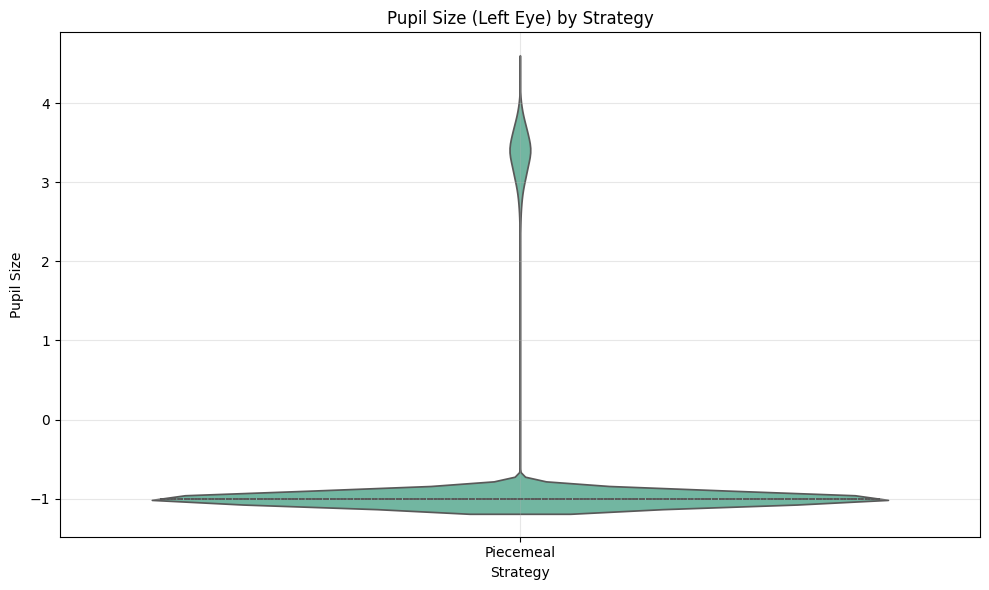

In [88]:


plt.figure(figsize=(10, 6))
sns.violinplot(data=ey, x='Strategy', y='ET_PupilLeft', inner='quartile', palette='Set2')
plt.title('Pupil Size (Left Eye) by Strategy')
plt.xlabel('Strategy')
plt.ylabel('Pupil Size')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


* Piecemeal have a major cluster of pupil sizes around 3 to 3.5 units.
* There’s a very flat, wide base near -1 pupil size — this looks suspicious:
* Pupil size cannot be negative → likely represents missing data, noise, or tracking errors that were coded as -1.
* These need to be cleaned before interpreting the true distribution.
* The main pupil size distribution (around 3-3.5) seems very similar across strategies:
* Piecemeal has median and spread in valid data range

## **BlankScreenData**

In [89]:
bd=pd.read_csv('6_BlankScreenData.csv')
bd.head()

UnixTime    Row       Segment                   Timestamp  \
0  1.679143e+09  21412  BlankScreen1  2023-03-18 18:04:06.402953   
1  1.679143e+09  21413  BlankScreen1  2023-03-18 18:04:06.411386   
2  1.679143e+09  21414  BlankScreen1  2023-03-18 18:04:06.419724   
3  1.679143e+09  21415  BlankScreen1  2023-03-18 18:04:06.427967   
4  1.679143e+09  21416  BlankScreen1  2023-03-18 18:04:06.436280   

   ET_GazeLeftx  ET_GazeLefty  ET_GazeRightx  ET_GazeRighty  ET_PupilLeft  \
0           NaN           NaN          789.0          425.0           NaN   
1           NaN           NaN          781.0          439.0           NaN   
2           NaN           NaN          792.0          462.0           NaN   
3           NaN           NaN          799.0          464.0           NaN   
4           NaN           NaN          798.0          463.0           NaN   

   ET_PupilRight  ET_TimeSignal  ET_DistanceLeft  ET_DistanceRight  \
0       4.151611     178404.693              NaN        719.831421   
1            NaN     178413.127              NaN        719.996826   
2            NaN     178421.463              NaN        720.185059   
3       4.173340     178429.708              NaN        720.331299   
4            NaN     178438.022              NaN        720.376892   

   ET_CameraLeftX  ET_CameraLeftY  ET_CameraRightX  ET_CameraRightY  \
0             NaN             NaN         0.417214         0.478727   
1             NaN             NaN         0.417243         0.478719   
2             NaN             NaN         0.417387         0.478662   
3             NaN             NaN         0.417403         0.478687   
4             NaN             NaN         0.417421         0.478654   

   ET_ValidityLeft  ET_ValidityRight  
0              4.0               0.0  
1              4.0               0.0  
2              4.0               0.0  
3              4.0               0.0  
4              4.0               0.0

In [90]:
bd.dtypes

UnixTime            float64
Row                   int64
Segment              object
Timestamp            object
ET_GazeLeftx        float64
ET_GazeLefty        float64
ET_GazeRightx       float64
ET_GazeRighty       float64
ET_PupilLeft        float64
ET_PupilRight       float64
ET_TimeSignal       float64
ET_DistanceLeft     float64
ET_DistanceRight    float64
ET_CameraLeftX      float64
ET_CameraLeftY      float64
ET_CameraRightX     float64
ET_CameraRightY     float64
ET_ValidityLeft     float64
ET_ValidityRight    float64
dtype: object

In [91]:
bd['Timestamp'] = pd.to_datetime(bd['Timestamp'], errors='coerce')

In [92]:
bd.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3596    False
3597    False
3598    False
3599    False
3600    False
Length: 3601, dtype: bool

In [93]:
bd.isnull().sum()

UnixTime               0
Row                    0
Segment                0
Timestamp              0
ET_GazeLeftx        1196
ET_GazeLefty        1196
ET_GazeRightx        253
ET_GazeRighty        253
ET_PupilLeft        1476
ET_PupilRight       1274
ET_TimeSignal          0
ET_DistanceLeft     1194
ET_DistanceRight     253
ET_CameraLeftX      1194
ET_CameraLeftY      1194
ET_CameraRightX      253
ET_CameraRightY      253
ET_ValidityLeft        0
ET_ValidityRight       0
dtype: int64

In [94]:
# Identify columns with outliers using IQR
numeric_cols = bd.select_dtypes(include=[np.number]).columns
outlier_cols = []
for col in numeric_cols:
    Q1 = bd[col].quantile(0.25)
    Q3 = bd[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    if ((bd[col] < lower) | (bd[col] > upper)).any():
        print(outlier_cols.append(col))

None
None
None
None
None
None
None


In [95]:
bd_cr=bd.select_dtypes(include=['float64','int64'])
bd_corr=bd_cr.corr().round(2)
bd_corr

UnixTime   Row  ET_GazeLeftx  ET_GazeLefty  ET_GazeRightx  \
UnixTime              1.00  1.00         -0.76         -0.75          -0.44   
Row                   1.00  1.00         -0.76         -0.75          -0.44   
ET_GazeLeftx         -0.76 -0.76          1.00          0.91           0.59   
ET_GazeLefty         -0.75 -0.75          0.91          1.00           0.51   
ET_GazeRightx        -0.44 -0.44          0.59          0.51           1.00   
ET_GazeRighty        -0.36 -0.36          0.29          0.29           0.65   
ET_PupilLeft         -0.87 -0.87          0.78          0.80           0.41   
ET_PupilRight        -0.62 -0.62          0.43          0.45           0.47   
ET_TimeSignal         1.00  1.00         -0.76         -0.75          -0.44   
ET_DistanceLeft      -0.80 -0.80          0.95          0.96           0.54   
ET_DistanceRight     -0.40 -0.40          0.36          0.36           0.82   
ET_CameraLeftX       -0.81 -0.81          0.95          0.96           0.54   
ET_CameraLeftY       -0.81 -0.81          0.95          0.96           0.54   
ET_CameraRightX      -0.42 -0.42          0.38          0.38           0.82   
ET_CameraRightY      -0.43 -0.43          0.38          0.38           0.83   
ET_ValidityLeft       0.26  0.26         -0.95         -0.96          -0.38   
ET_ValidityRight      0.22  0.22         -0.38         -0.38          -0.83   

                  ET_GazeRighty  ET_PupilLeft  ET_PupilRight  ET_TimeSignal  \
UnixTime                  -0.36         -0.87          -0.62           1.00   
Row                       -0.36         -0.87          -0.62           1.00   
ET_GazeLeftx               0.29          0.78           0.43          -0.76   
ET_GazeLefty               0.29          0.80           0.45          -0.75   
ET_GazeRightx              0.65          0.41           0.47          -0.44   
ET_GazeRighty              1.00          0.23           0.47          -0.36   
ET_PupilLeft               0.23          1.00           0.63          -0.87   
ET_PupilRight              0.47          0.63           1.00          -0.62   
ET_TimeSignal             -0.36         -0.87          -0.62           1.00   
ET_DistanceLeft            0.31          0.83           0.46          -0.80   
ET_DistanceRight           0.88          0.28           0.48          -0.40   
ET_CameraLeftX             0.31          0.84           0.46          -0.81   
ET_CameraLeftY             0.31          0.84           0.46          -0.81   
ET_CameraRightX            0.88          0.30           0.49          -0.42   
ET_CameraRightY            0.88          0.30           0.50          -0.43   
ET_ValidityLeft           -0.15         -0.84          -0.37           0.26   
ET_ValidityRight          -0.88         -0.30          -0.49           0.22   

                  ET_DistanceLeft  ET_DistanceRight  ET_CameraLeftX  \
UnixTime                    -0.80             -0.40           -0.81   
Row                         -0.80             -0.40           -0.81   
ET_GazeLeftx                 0.95              0.36            0.95   
ET_GazeLefty                 0.96              0.36            0.96   
ET_GazeRightx                0.54              0.82            0.54   
ET_GazeRighty                0.31              0.88            0.31   
ET_PupilLeft                 0.83              0.28            0.84   
ET_PupilRight                0.46              0.48            0.46   
ET_TimeSignal               -0.80             -0.40           -0.81   
ET_DistanceLeft              1.00              0.38            1.00   
ET_DistanceRight             0.38              1.00            0.38   
ET_CameraLeftX               1.00              0.38            1.00   
ET_CameraLeftY               1.00              0.38            1.00   
ET_CameraRightX              0.40              1.00            0.40   
ET_CameraRightY              0.40              1.00            0.40   
ET_ValidityLeft             -1.00   

In [96]:
bd.head()

UnixTime    Row       Segment                  Timestamp  ET_GazeLeftx  \
0  1.679143e+09  21412  BlankScreen1 2023-03-18 18:04:06.402953           NaN   
1  1.679143e+09  21413  BlankScreen1 2023-03-18 18:04:06.411386           NaN   
2  1.679143e+09  21414  BlankScreen1 2023-03-18 18:04:06.419724           NaN   
3  1.679143e+09  21415  BlankScreen1 2023-03-18 18:04:06.427967           NaN   
4  1.679143e+09  21416  BlankScreen1 2023-03-18 18:04:06.436280           NaN   

   ET_GazeLefty  ET_GazeRightx  ET_GazeRighty  ET_PupilLeft  ET_PupilRight  \
0           NaN          789.0          425.0           NaN       4.151611   
1           NaN          781.0          439.0           NaN            NaN   
2           NaN          792.0          462.0           NaN            NaN   
3           NaN          799.0          464.0           NaN       4.173340   
4           NaN          798.0          463.0           NaN            NaN   

   ET_TimeSignal  ET_DistanceLeft  ET_DistanceRight  ET_CameraLeftX  \
0     178404.693              NaN        719.831421             NaN   
1     178413.127              NaN        719.996826             NaN   
2     178421.463              NaN        720.185059             NaN   
3     178429.708              NaN        720.331299             NaN   
4     178438.022              NaN        720.376892             NaN   

   ET_CameraLeftY  ET_CameraRightX  ET_CameraRightY  ET_ValidityLeft  \
0             NaN         0.417214         0.478727              4.0   
1             NaN         0.417243         0.478719              4.0   
2             NaN         0.417387         0.478662              4.0   
3             NaN         0.417403         0.478687              4.0   
4             NaN         0.417421         0.478654              4.0   

   ET_ValidityRight  
0               0.0  
1               0.0  
2               0.0  
3               0.0  
4               0.0

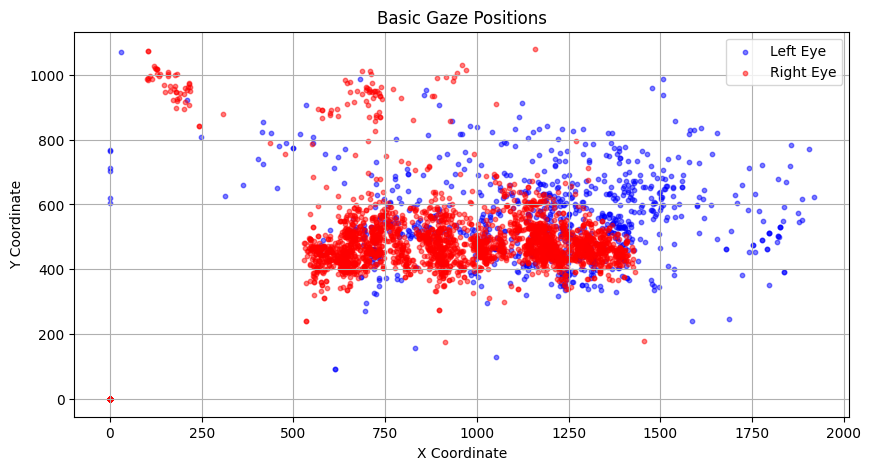

In [97]:
plt.figure(figsize=(10, 5))

# Left eye
plt.scatter(bd['ET_GazeLeftx'], bd['ET_GazeLefty'], 
            alpha=0.5, s=10, label='Left Eye', color='blue')

# Right eye
plt.scatter(bd['ET_GazeRightx'], bd['ET_GazeRighty'], 
            alpha=0.5, s=10, label='Right Eye', color='red')

plt.title('Basic Gaze Positions')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()
plt.grid(True)
plt.show()

- Fixation clusters: Dense point clouds show where the eyes lingered (even on a blank screen, this may reveal default gaze patterns)
- Tracking alignment: If red/blue dots overlap well → good binocular tracking. If separated → possible calibration issues
- Data coverage: Gaps indicate missing data (e.g., during blinks)